In [74]:
import os
import sys
import math
import uproot
import numpy as np

from scipy    import stats
from datetime import datetime

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from collections import namedtuple

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import peak_functions as pf
import fit_functions  as fitf

In [3]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 13

In [4]:
filename = '/Users/romoluque_c/LEGEND/BACON/datatest/NewSiPMCal_53V.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

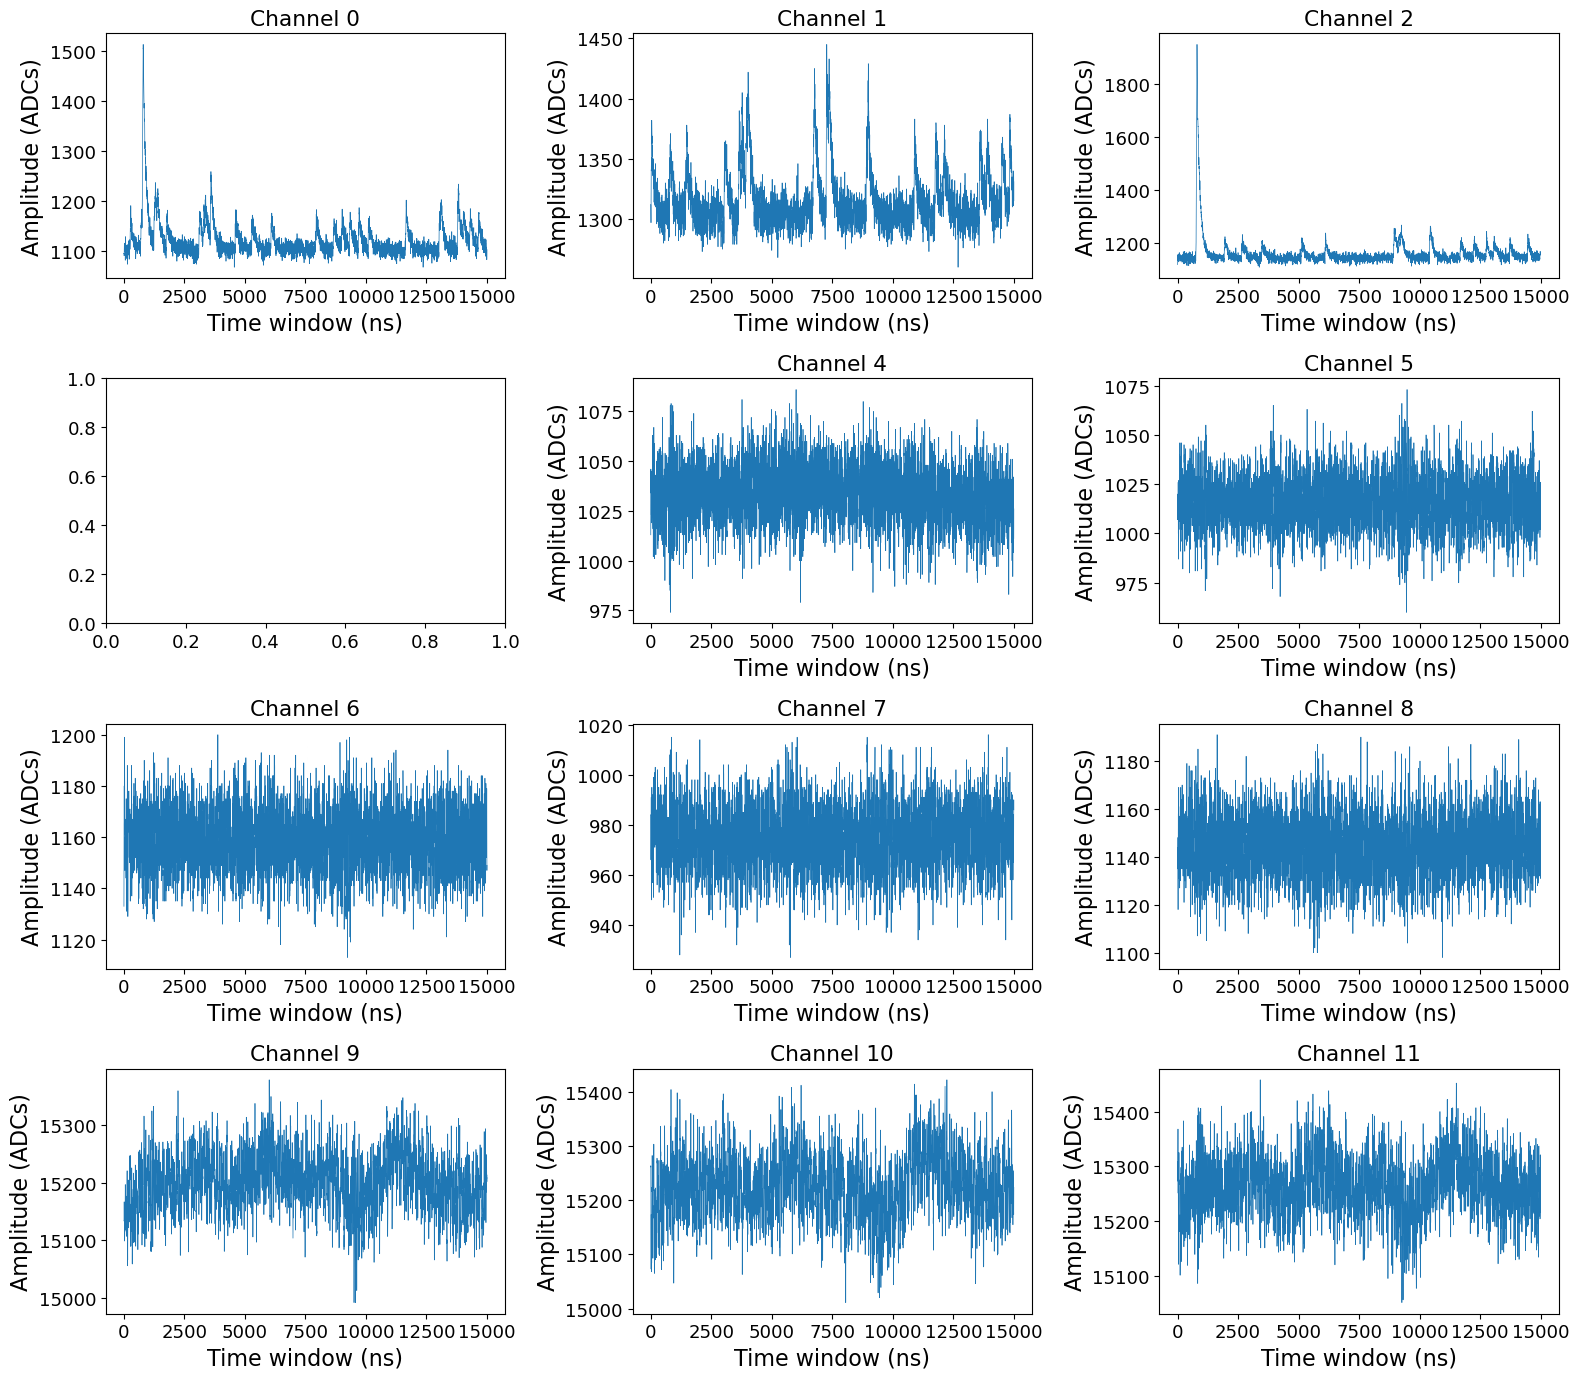

In [5]:
choose_evt = 4
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    if k==3: continue
    i = int(k/3)
    j = k%3
    wf = np.array(RawTree[f'chan{k}/rdigi'].array())[choose_evt]
    axs[i][j].plot(2*np.arange(len(wf)), wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
plt.tight_layout()
plt.show()

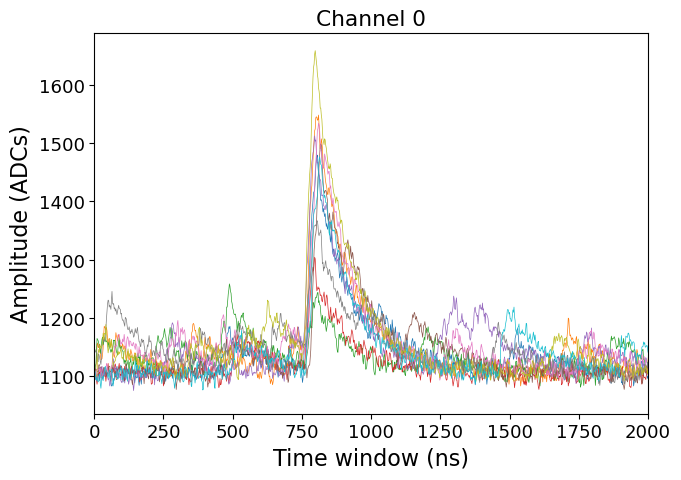

In [6]:
plt.figure(figsize=(7, 5))
channel  = 0
for evt in range(10):
    wf = np.array(RawTree[f'chan{channel}/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

In [7]:
#num_evts = 100
chan0 = 0
chan1 = 1
chan2 = 2
wfs_channel0 = np.array(RawTree[f'chan{chan0}/rdigi'].array())#[:num_evts]
wfs_channel1 = np.array(RawTree[f'chan{chan1}/rdigi'].array())#[:num_evts]
wfs_channel2 = np.array(RawTree[f'chan{chan2}/rdigi'].array())#[:num_evts]
subt_raw_wfs0 = list(map(pf.subtract_baseline, wfs_channel0))
subt_raw_wfs1 = list(map(pf.subtract_baseline, wfs_channel1))
subt_raw_wfs2 = list(map(pf.subtract_baseline, wfs_channel2))

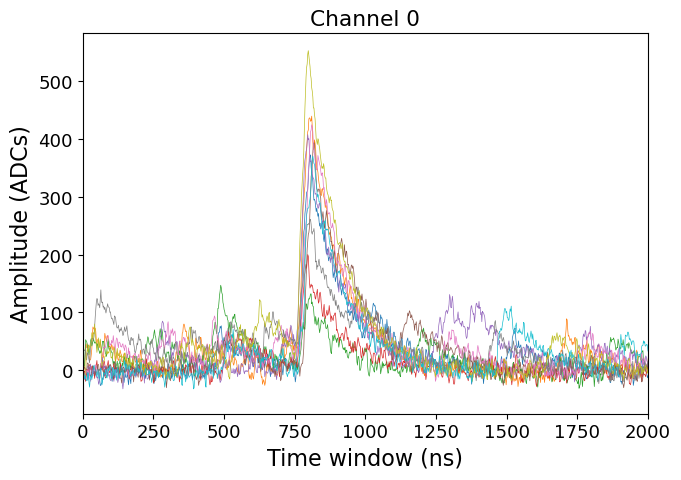

In [8]:
plt.figure(figsize=(7, 5))
channel  = 0
for evt in range(10):
    plt.plot(2*np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

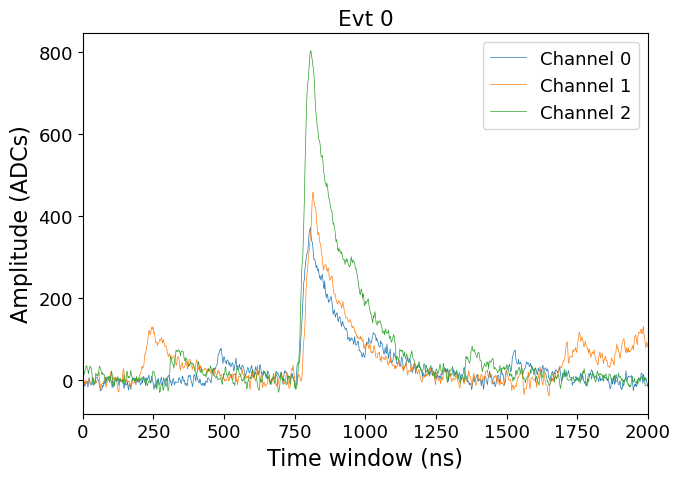

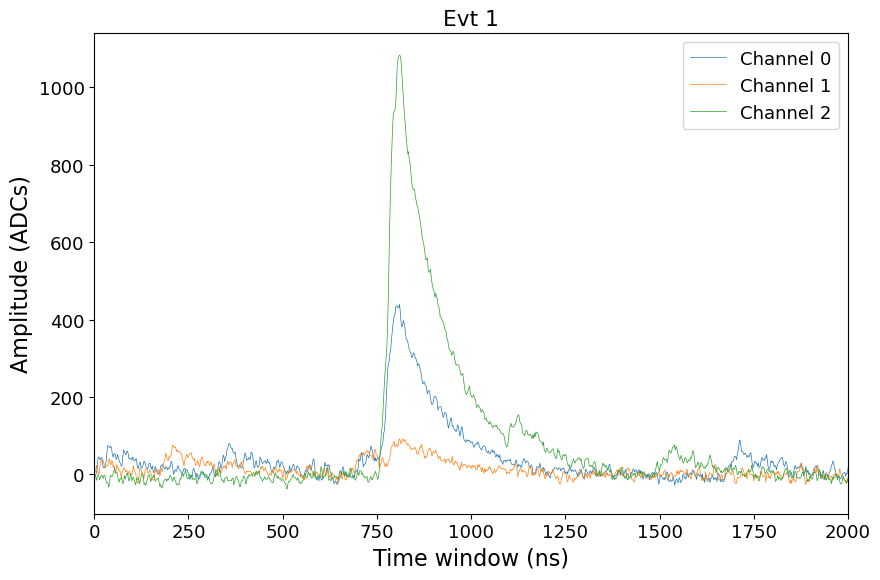

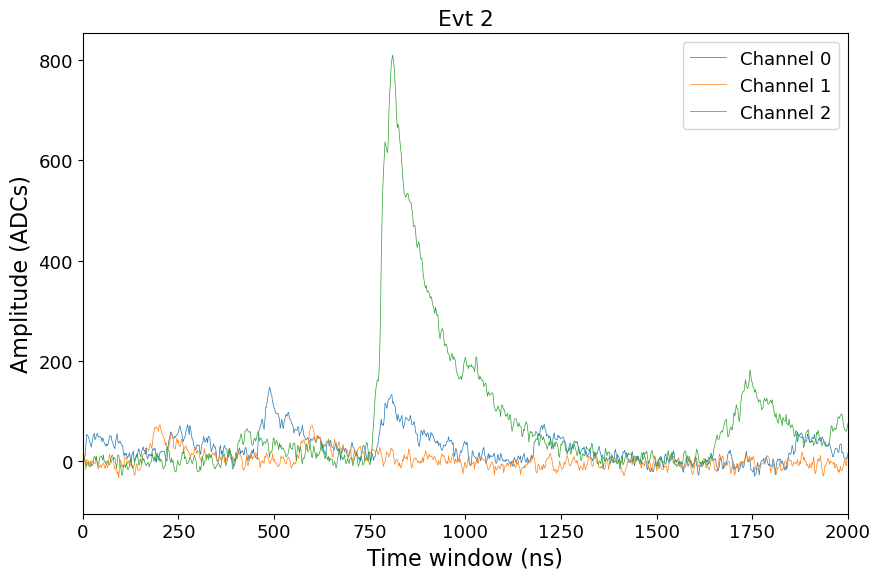

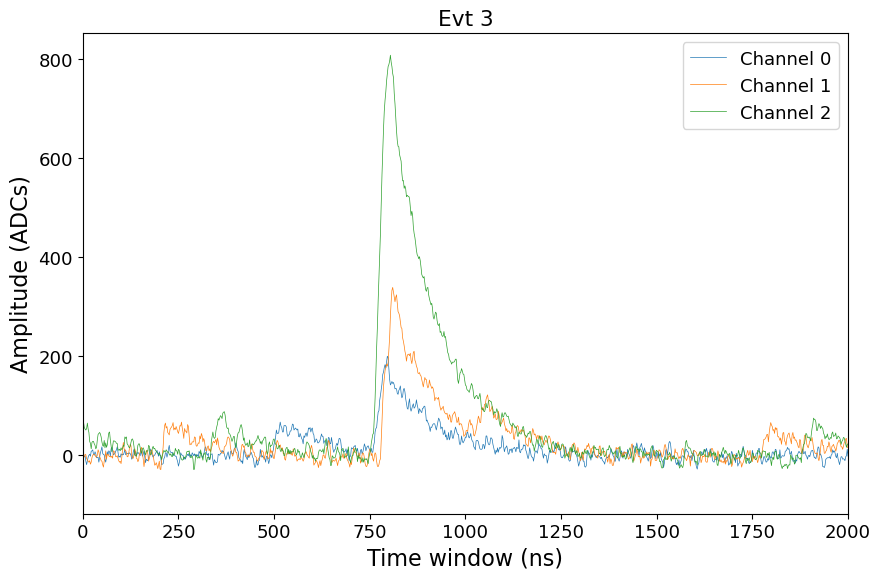

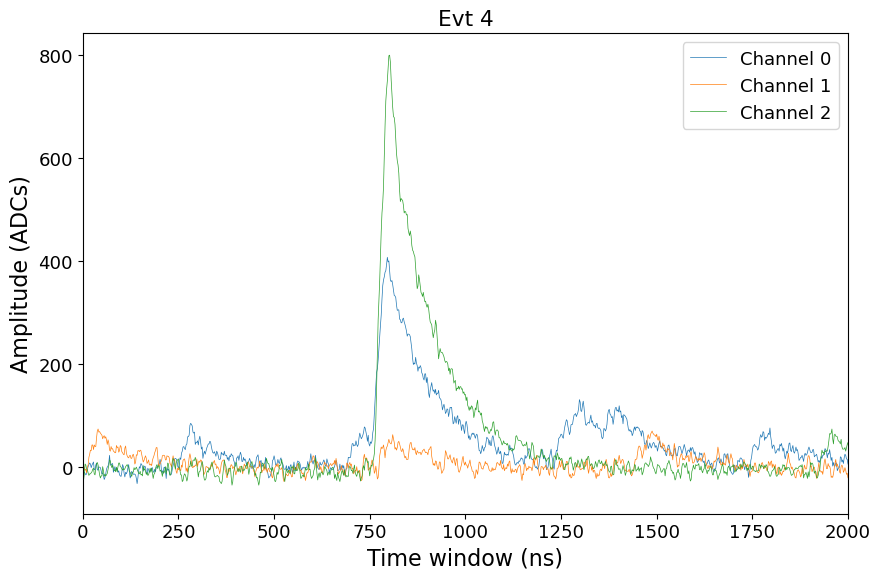

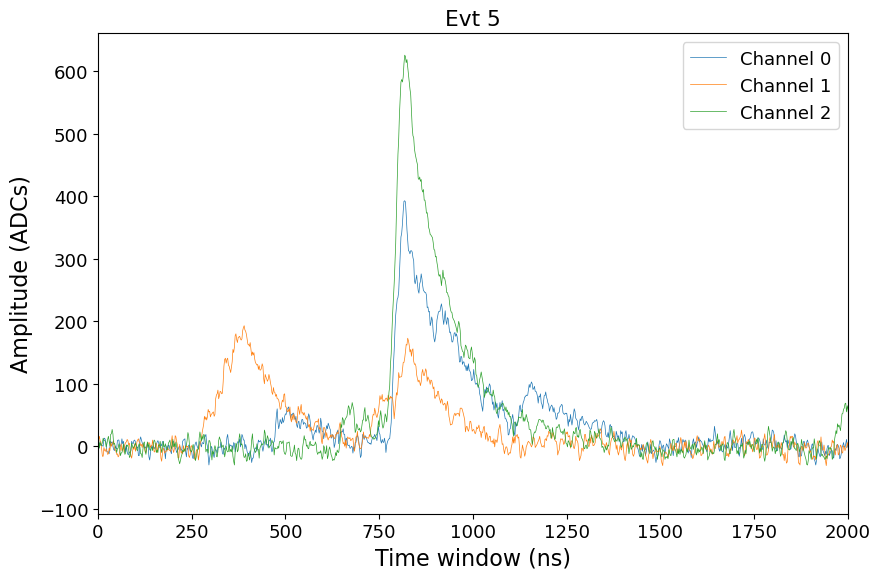

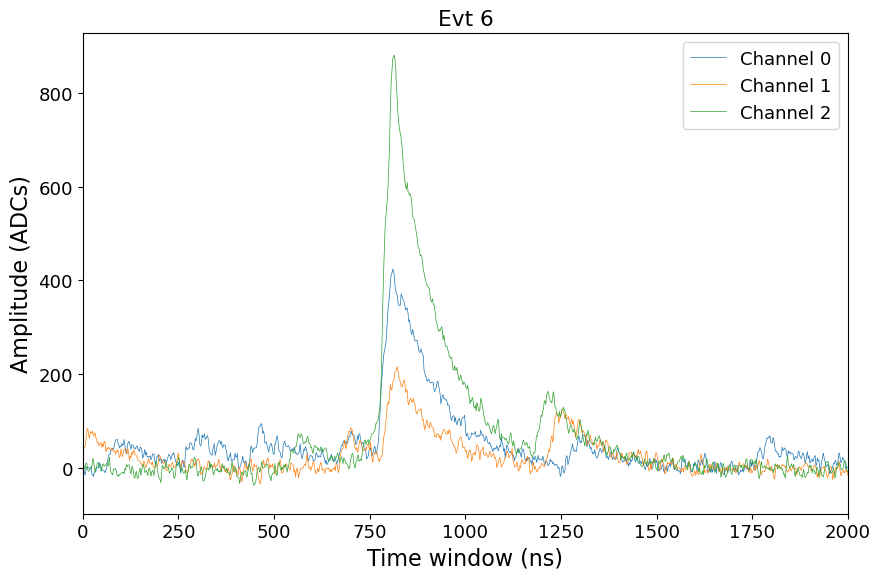

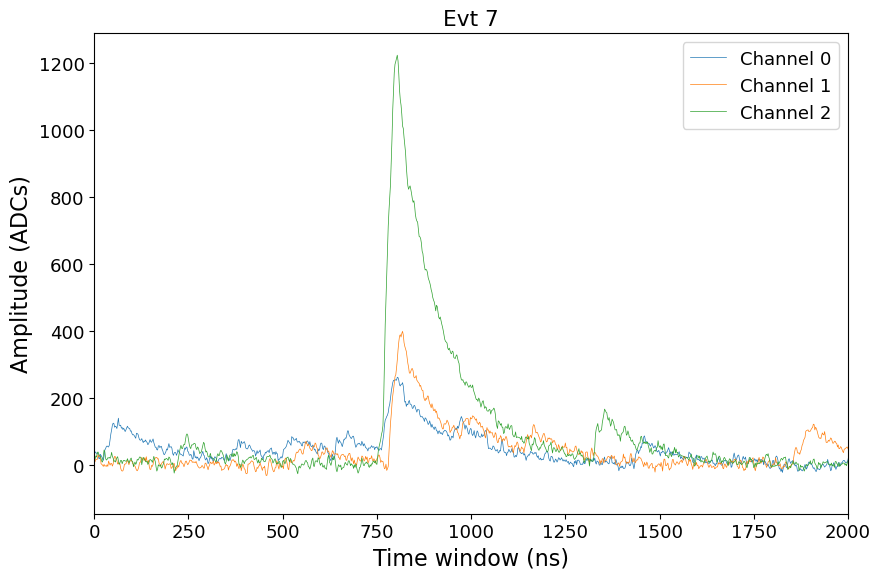

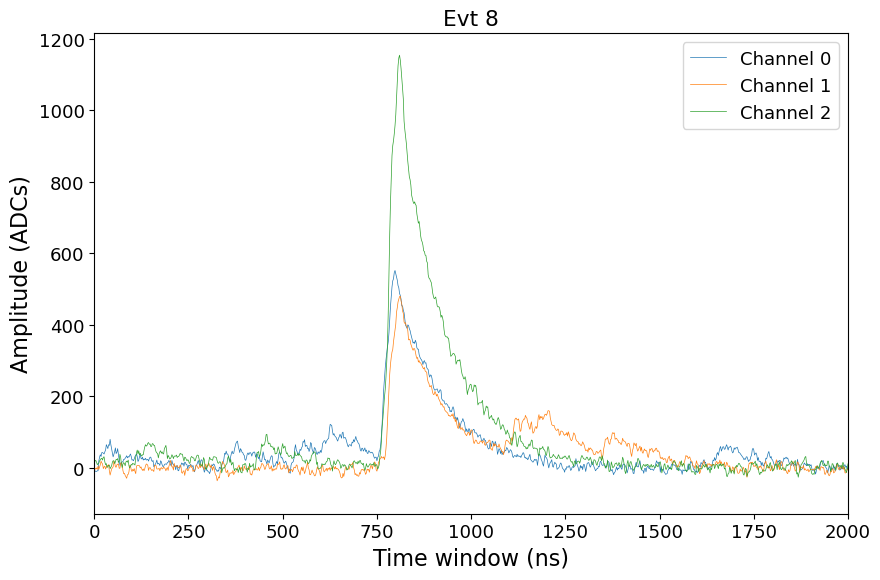

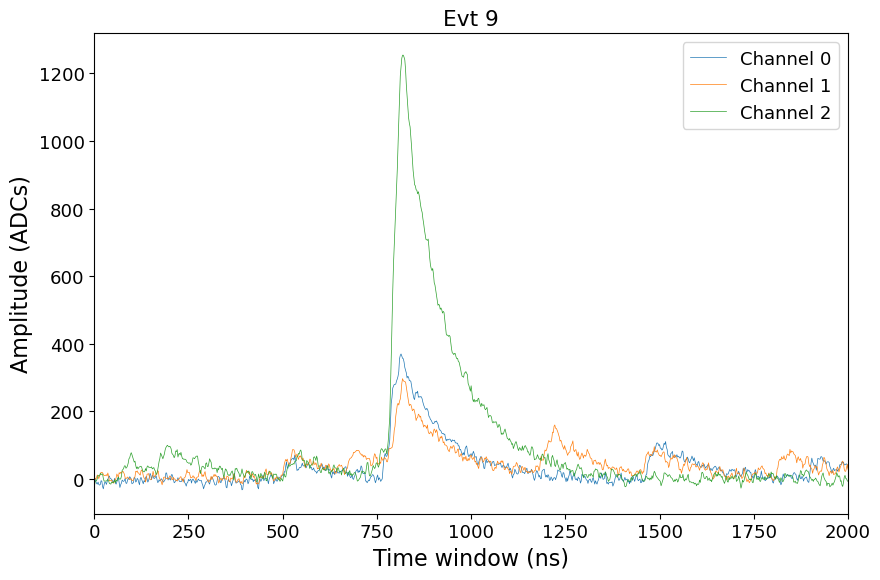

In [9]:
plt.figure(figsize=(7, 5))
for evt in range(10):
    plt.plot(2*np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5, label='Channel 0')
    plt.plot(2*np.arange(len(subt_raw_wfs1[evt])), subt_raw_wfs1[evt], linewidth=0.5, label='Channel 1')
    plt.plot(2*np.arange(len(subt_raw_wfs2[evt])), subt_raw_wfs2[evt], linewidth=0.5, label='Channel 2')
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADCs)', fontsize=16)
    plt.xlim(0,2000)
    plt.title(f"Evt {evt}")
    plt.tight_layout()
    plt.legend()
    plt.show()

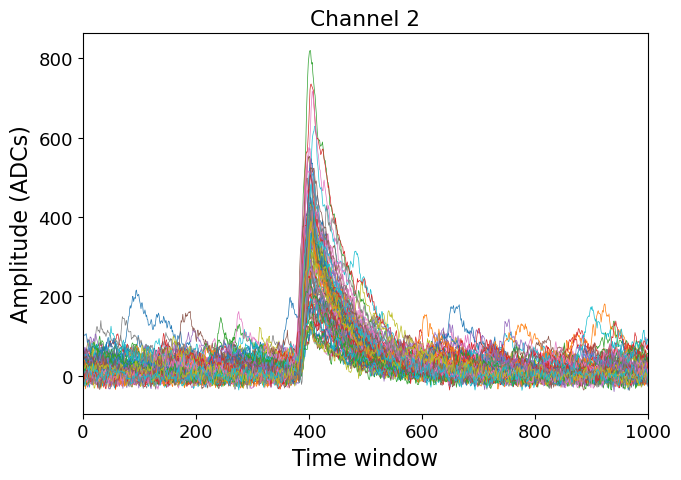

In [10]:
plt.figure(figsize=(7, 5))
channel  = 2
num_evts = 100
for evt in range(num_evts):
    plt.plot(np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5)
plt.xlabel('Time window', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,1000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

In [11]:
max_wf0 = np.array([np.max(subt_raw_wfs0[evt][350:500]) for evt in range(len(subt_raw_wfs0))])
max_wf1 = np.array([np.max(subt_raw_wfs1[evt][350:500]) for evt in range(len(subt_raw_wfs1))])
max_wf2 = np.array([np.max(subt_raw_wfs2[evt][350:500]) for evt in range(len(subt_raw_wfs2))])

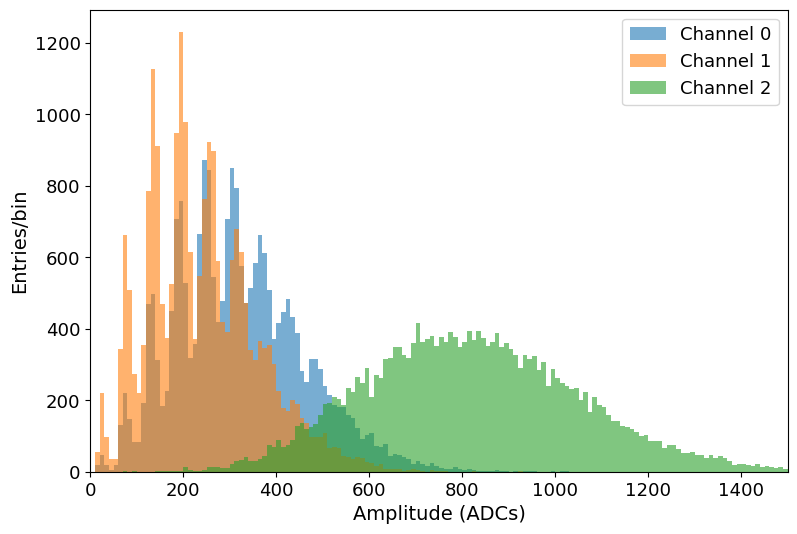

In [12]:
plt.hist(max_wf0, bins=150, range=(0, 1500), alpha=0.6, label='Channel 0')
plt.hist(max_wf1, bins=150, range=(0, 1500), alpha=0.6, label='Channel 1')
plt.hist(max_wf2, bins=150, range=(0, 1500), alpha=0.6, label='Channel 2')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
plt.xlim(0, 1500)
plt.legend()
plt.show()

## Data September

In [35]:
data_path = '/Users/romoluque_c/LEGEND/BACON/datatest/SiPM_tests_sept/'

#wfs_channel0_rt2 = np.array(RawTree2[f'chan{channel}/rdigi'].array())
#subt_raw_wfs0_rt2 = list(map(pf.subtract_baseline, wfs_channel0_rt2))
#max_wf0_rt2 = np.array([np.max(subt_raw_wfs0_rt2[evt][int(1550/2):int(1700/2)]) 
#                        for evt in range(len(subt_raw_wfs0_rt2))])

In [150]:
def load_data(channel, day, vbias, vled):
    return uproot.open(data_path + f'QE{channel}-09_{day}_2023-V_{vbias}-A_{vled}-Hz_10.root')['RawTree']

def compute_max_wf(RawTree, channel=0):
    wfs_chann   = np.array(RawTree[f'chan{channel}/rdigi'].array())
    subt_raw_wf = list(map(pf.subtract_baseline, wfs_chann))
    max_wf      = np.array([np.max(subt_raw_wf[evt][int(1550/2):int(1700/2)]) for evt in range(len(subt_raw_wf))])
    return max_wf

def load_data_and_compute_max_wf(channel, day, vbias, vled):
    data   = load_data(channel, day, vbias, vled)
    max_wf = compute_max_wf(data)
    return max_wf

In [125]:
RawTree1  = load_data(channel=1,  day='01', vbias=55, vled=7.4)
RawTree2  = load_data(channel=2,  day='01', vbias=55, vled=7.4)
RawTree65 = load_data(channel=65, day='07', vbias=55, vled=6.4)

In [76]:
channels = [   1,    2,    3,   55,   56,   57,   58,   59,   60,   64,   65,   66]
vleds0   = [   7,    7,    7,    6,    6,    6,    6,    6,    6,    6,    6,    6]
days     = ['01', '01', '01', '11', '11', '11', '11', '11', '11', '07', '07', '07']

channel_v    = namedtuple('channel', 'channel vbias vled')
all_max_data = {channel_v(channel=ch, vbias=vb, vled=vl): load_data_and_compute_max_wf(ch, day, vb, vl)
                for ch, vled0, day in zip(channels, vleds0, days)
                for vl             in [vled0 + 0.4, vled0 + 0.6]
                for vb             in [55, 56]}

In [78]:
all_max_data;

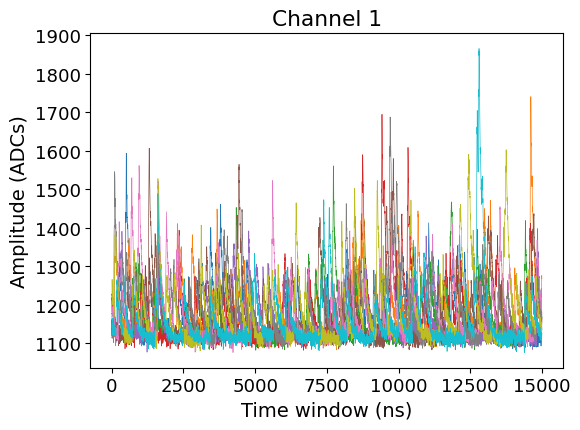

In [126]:
channel = 1
plt.figure(figsize=(6, 4.5))
for evt in range(10):
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

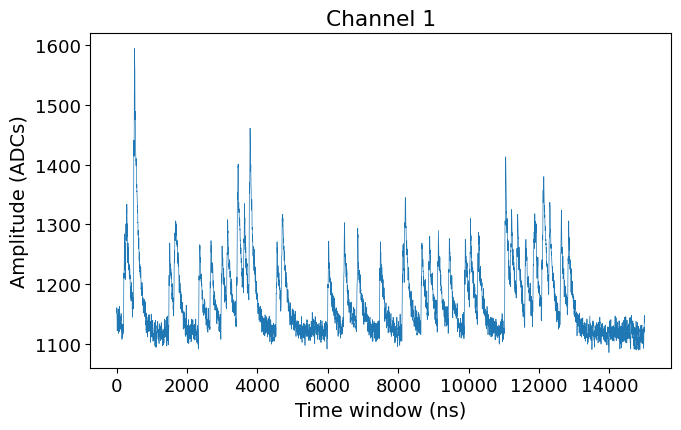

In [127]:
channel = 1
plt.figure(figsize=(7, 4.5))
for evt in range(1):
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

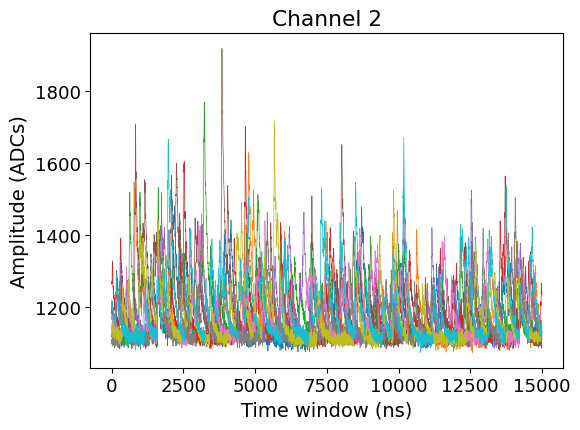

In [128]:
channel = 2
plt.figure(figsize=(6, 4.5))
for evt in range(10):
    wf2 = np.array(RawTree2[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

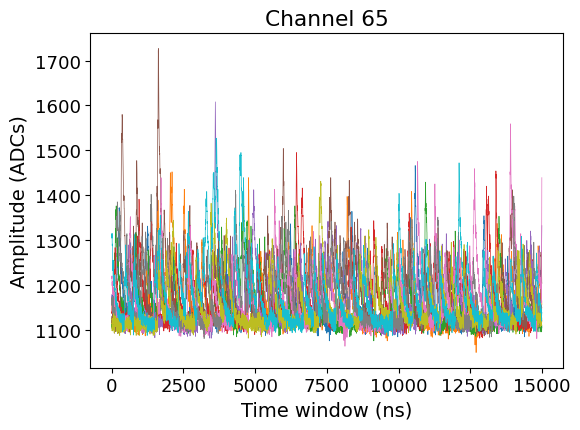

In [129]:
channel = 65
plt.figure(figsize=(6, 4.5))
for evt in range(10):
    wf2 = np.array(RawTree65[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

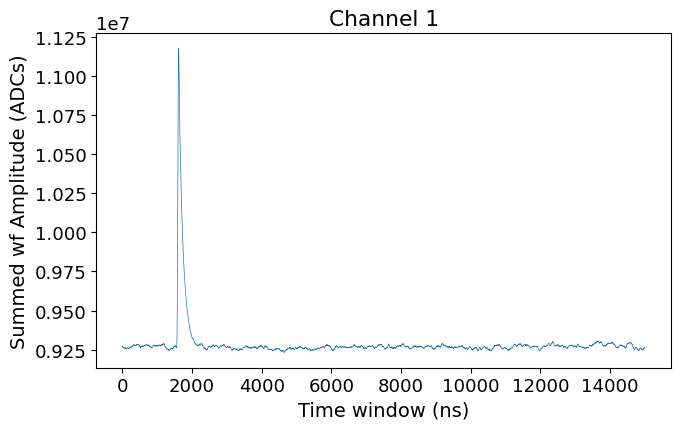

In [151]:
channel  = 1
num_evts = 100
plt.figure(figsize=(7, 4.5))
sum_wf2 = np.sum(np.array(RawTree4[f'chan0/rdigi'].array())[:], axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=0.5)
#plt.axvspan(1500, 1750, color='grey', alpha=0.2)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Summed wf Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

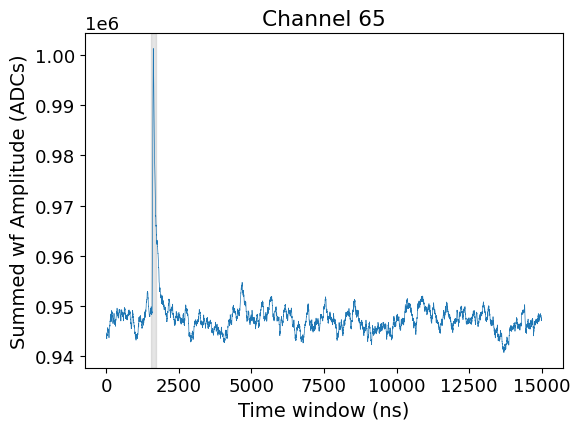

In [139]:
channel  = 65
num_evts = 100
plt.figure(figsize=(6, 4.5))
sum_wf2 = np.sum(np.array(RawTree65[f'chan0/rdigi'].array()), axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Summed wf Amplitude (ADCs)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

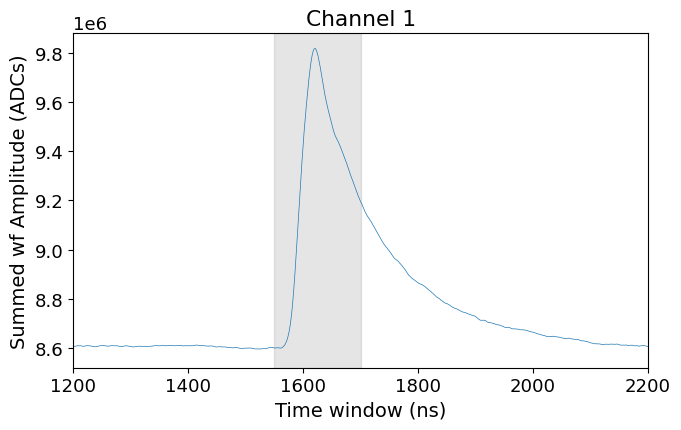

In [156]:
channel  = 1
num_evts = 100
plt.figure(figsize=(7, 4.5))
sum_wf2 = np.sum(np.array(RawTree1[f'chan0/rdigi'].array()), axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=0.5)
plt.axvspan(1550, 1700, color='grey', alpha=0.2)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Summed wf Amplitude (ADCs)', fontsize=14)
plt.xlim(1200,2200)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

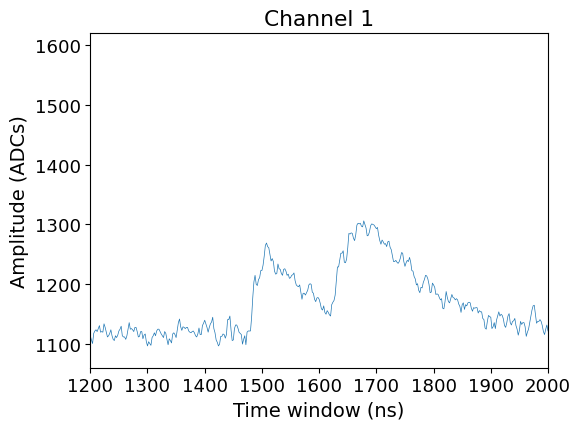

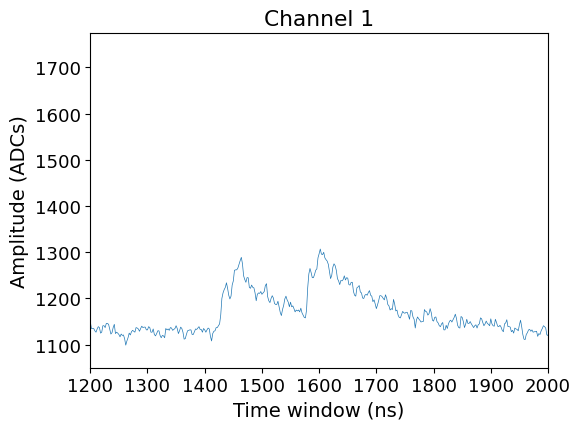

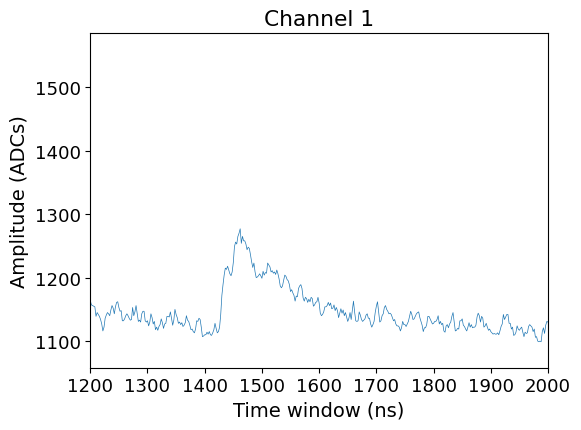

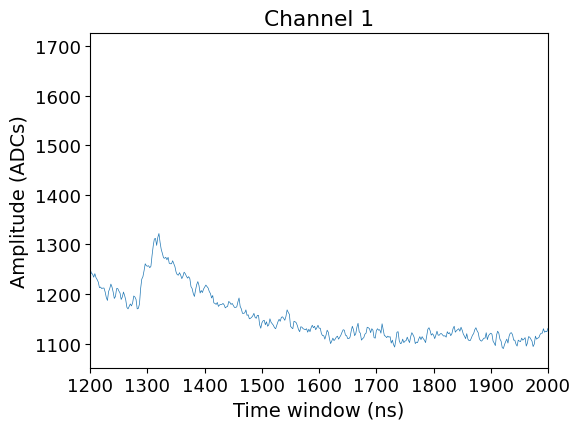

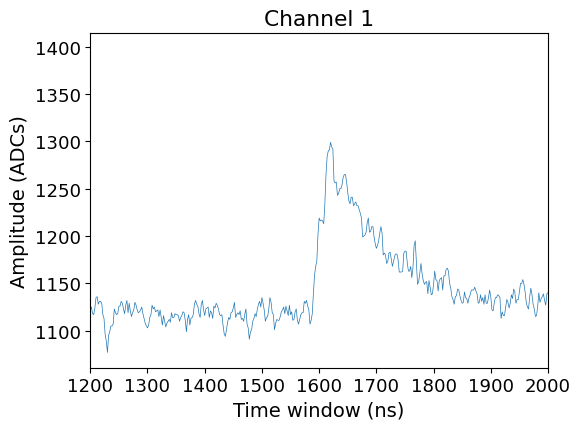

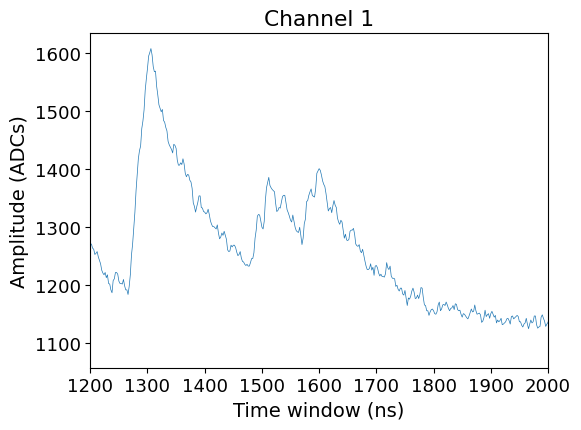

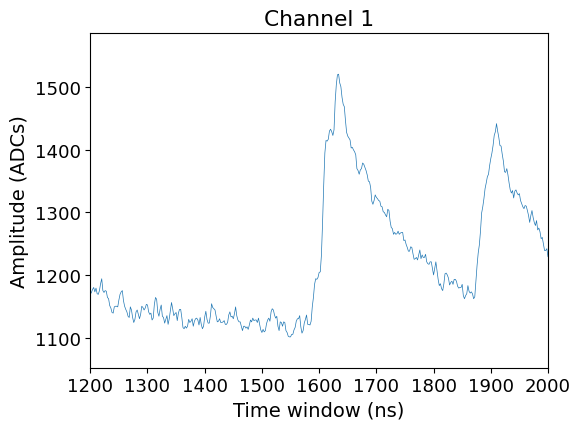

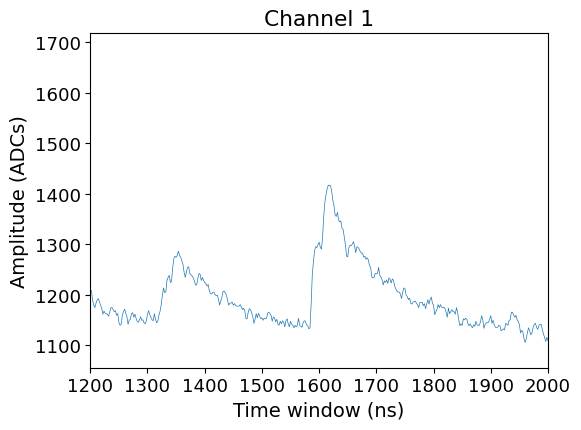

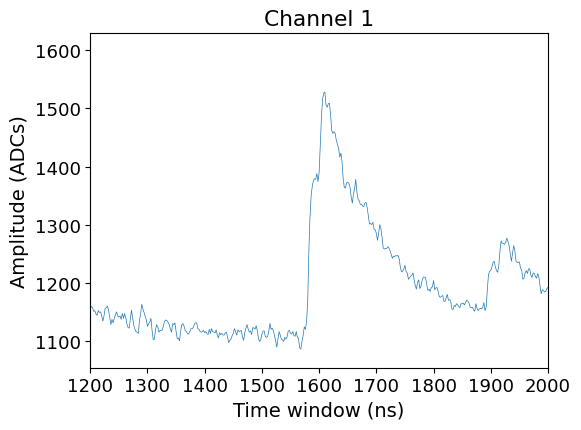

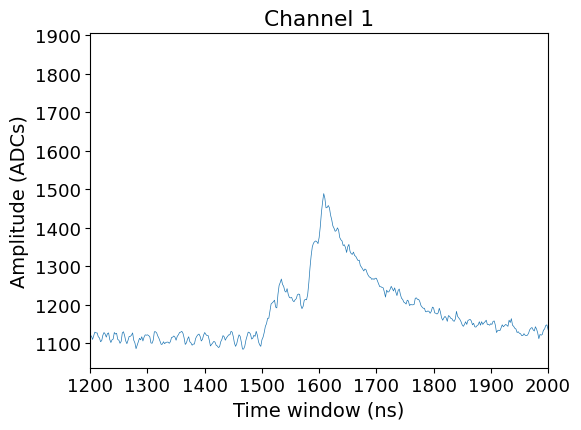

In [135]:
channel = 1
for evt in range(10):
    plt.figure(figsize=(6, 4.5))
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
    plt.xlabel('Time window (ns)', fontsize=14)
    plt.ylabel('Amplitude (ADCs)', fontsize=14)
    plt.xlim(1200,2000)
    plt.title(f"Channel {channel}")
    plt.tight_layout()
    plt.show()

### Analyze spectra

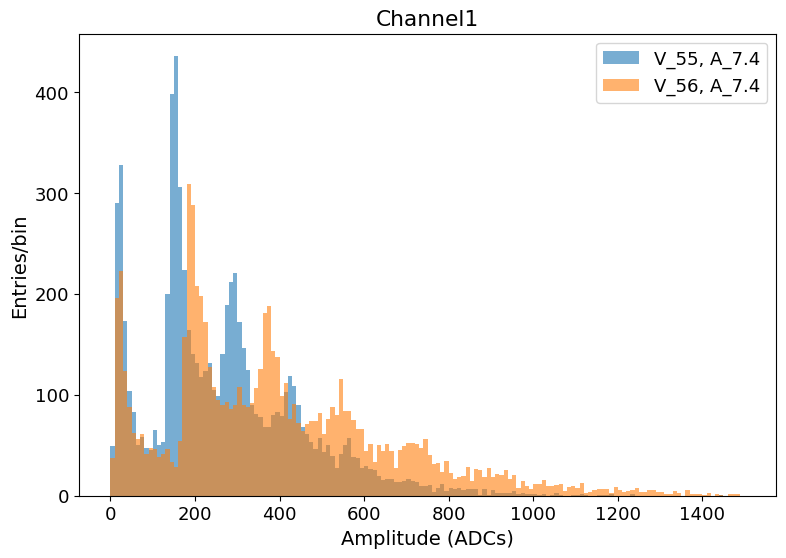

In [157]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_55, A_7.4')
plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_56, A_7.4')
plt.title('Channel1')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

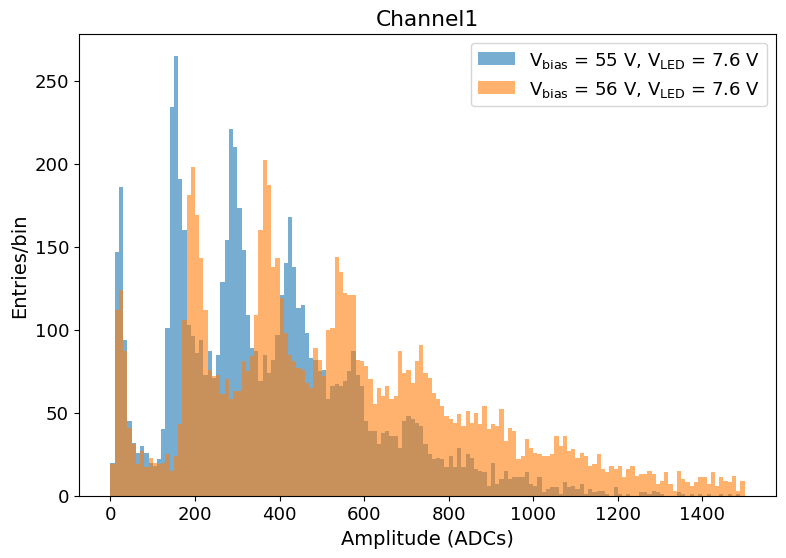

In [168]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 56 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.title('Channel1')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

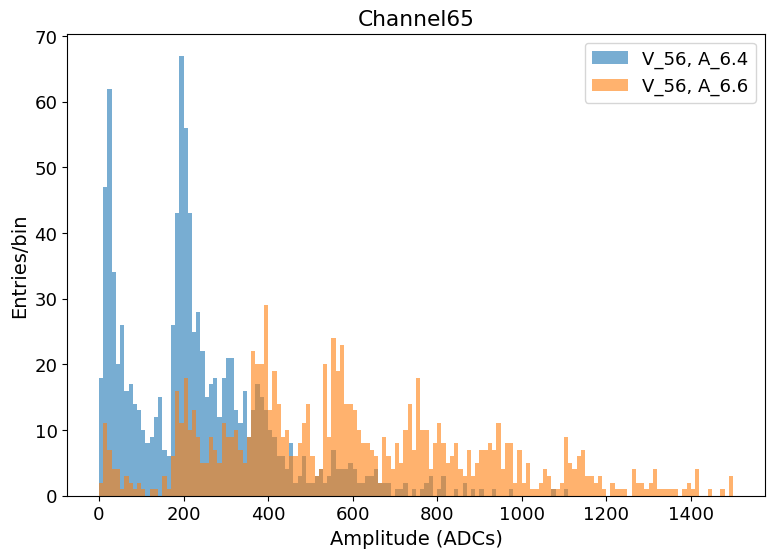

In [149]:
plt.hist(all_max_data[channel_v(channel=65, vbias=56, vled=6.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_56, A_6.4')
plt.hist(all_max_data[channel_v(channel=65, vbias=56, vled=6.6)], bins=150, range=(0, 1500), alpha=0.6, label='V_56, A_6.6')
plt.title('Channel65')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

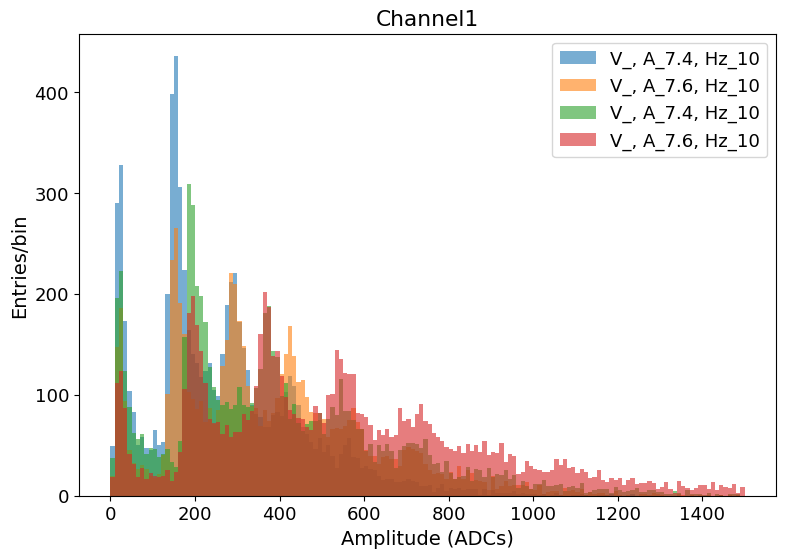

In [145]:
channel = 1
plt.hist(all_max_data[channel_v(channel=channel, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_, A_7.4, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=55, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V_, A_7.6, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=56, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_, A_7.4, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=56, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V_, A_7.6, Hz_10')
plt.title(f'Channel{channel}')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

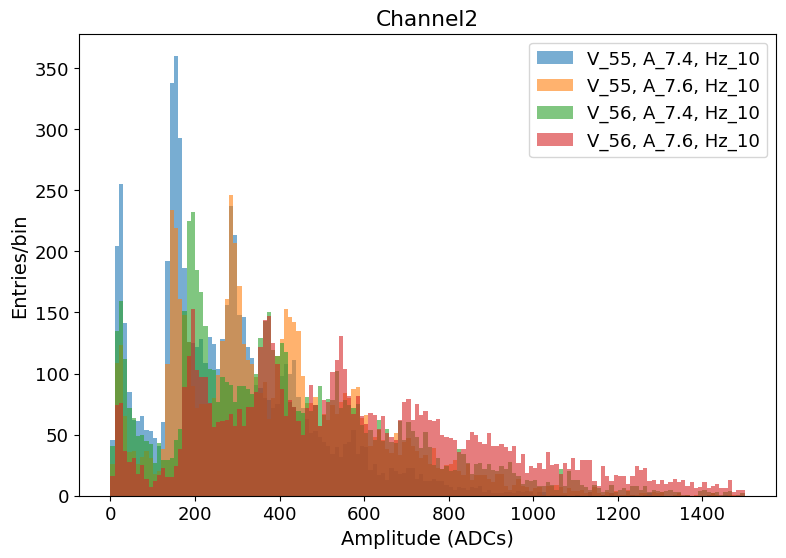

In [158]:
channel = 2
plt.hist(all_max_data[channel_v(channel=channel, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_55, A_7.4, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=55, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V_55, A_7.6, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=56, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V_56, A_7.4, Hz_10')
plt.hist(all_max_data[channel_v(channel=channel, vbias=56, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V_56, A_7.6, Hz_10')
plt.title(f'Channel{channel}')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

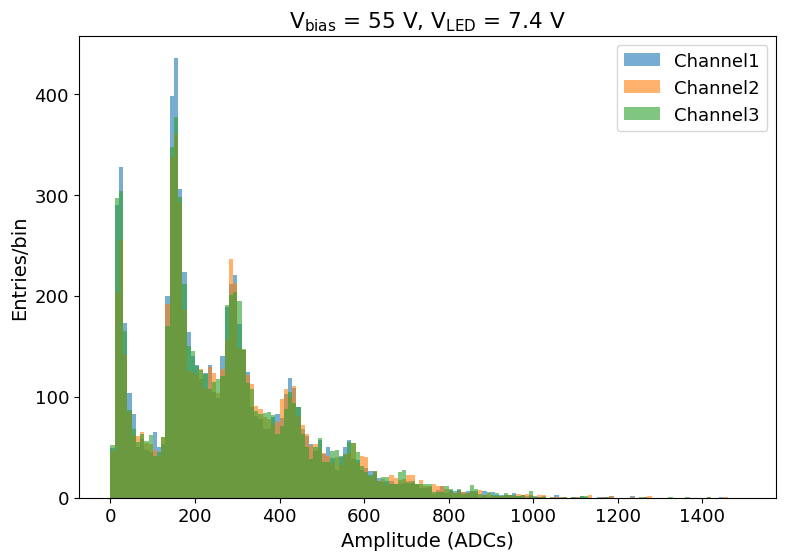

In [169]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel1')
plt.hist(all_max_data[channel_v(channel=2, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel2')
plt.hist(all_max_data[channel_v(channel=3, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel3')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.4 V')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

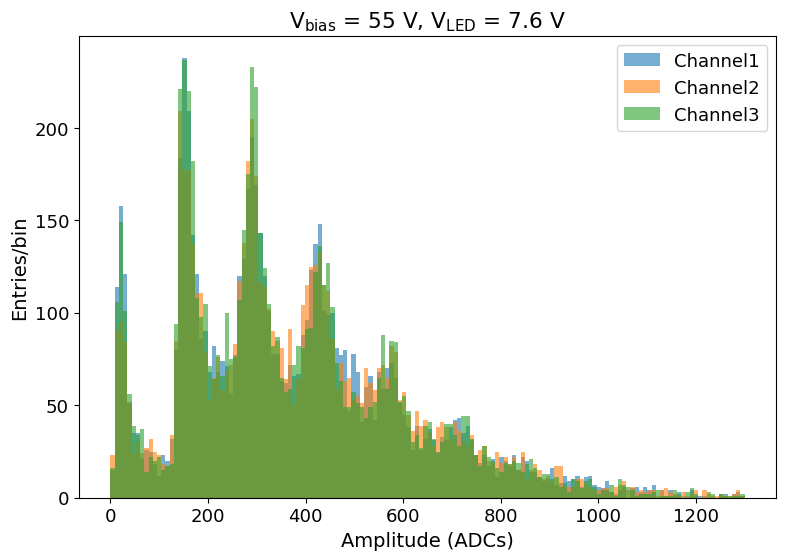

In [165]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel1')
plt.hist(all_max_data[channel_v(channel=2, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel2')
plt.hist(all_max_data[channel_v(channel=3, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel3')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

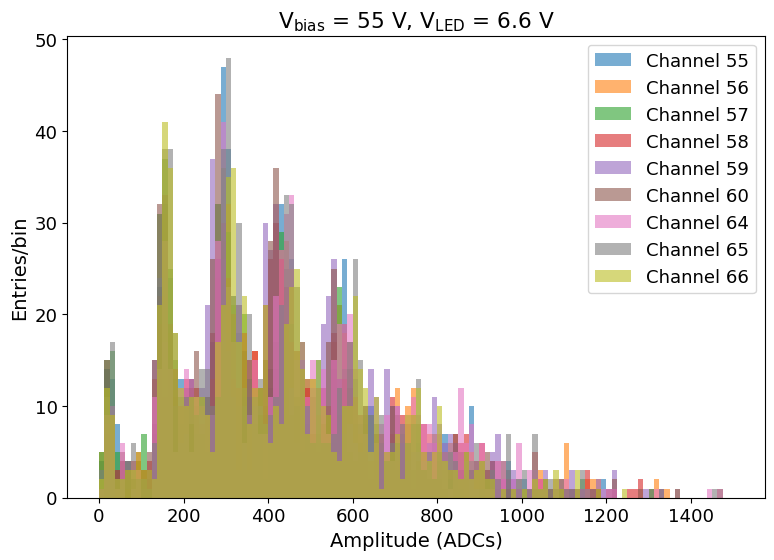

In [171]:
vled = 6.6
vb   = 55
for ch in [55, 56, 57, 58, 59, 60, 64, 65, 66]:
    plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=120, range=(0, 1500), alpha=0.6, label=f'Channel {ch}')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 6.6 V')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

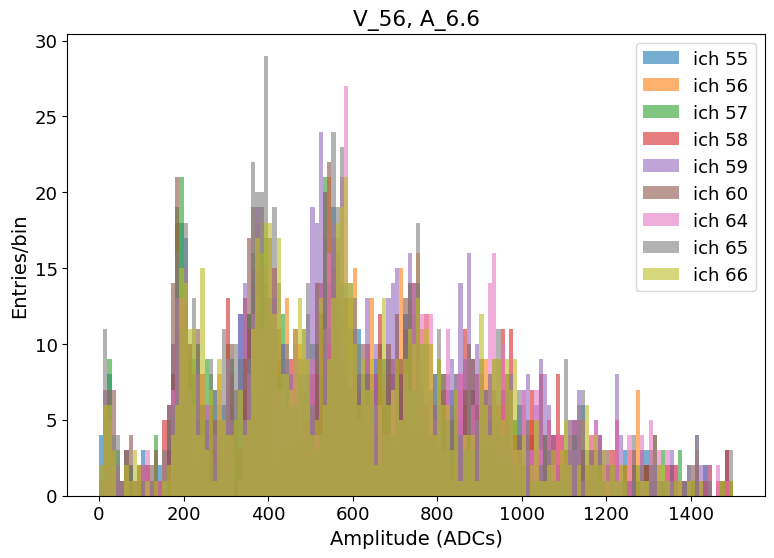

In [92]:
vled = 6.6
vb   = 56
for ch in [55, 56, 57, 58, 59, 60, 64, 65, 66]:
    plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=150, range=(0, 1500), alpha=0.6, label=f'ich {ch}')
plt.title(f'V_{vb}, A_{vled}')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

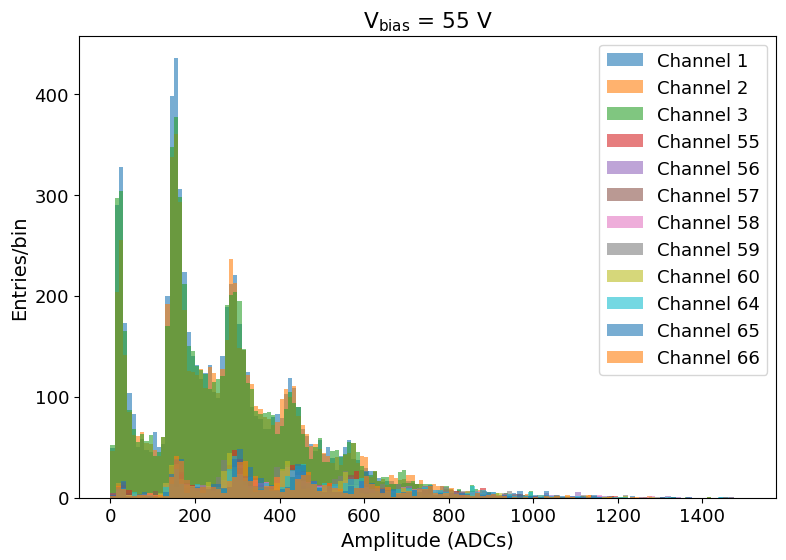

In [332]:
vled = 6.6
vb   = 55
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel 1')
plt.hist(all_max_data[channel_v(channel=2, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel 2')
plt.hist(all_max_data[channel_v(channel=3, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel 3')
for ch in [55, 56, 57, 58, 59, 60, 64, 65, 66]:
    plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=120, range=(0, 1500), alpha=0.6, label=f'Channel {ch}')
plt.title('V$_{\mathrm{bias}}$ = 55 V')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

### Fit

In [96]:
# Define the function for a single Gaussian peak
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

# Define the function for multiple Gaussian peaks
def multi_gaussian(x, *params):
    n_peaks = len(params) // 3
    y       = np.zeros_like(x)
    for i in range(n_peaks):
        amplitude = params[i * 3]
        mean      = params[i * 3 + 1]
        stddev    = params[i * 3 + 2]
        y += gaussian(x, amplitude, mean, stddev)
    return y

def shift_to_bin_centers(x):
    """
    Return bin centers, given bin lower edges.
    """
    return x[:-1] + np.diff(x) * 0.5

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

def plot_linear_fit(y, yerr):
    x    = np.arange(len(y))+1
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope*x + intercept
    
    fig = plt.figure(figsize=(8,5))
    plt.errorbar(x, y, yerr=yerr, marker='_', markersize=5, linestyle='', c='k', label=f'Measured gain values')
    plt.plot(x, line, color='r', alpha=0.7, label=f'Fit: y = x*{round(slope, 2)} - {round(np.abs(intercept), 2)}, \n     R$^2$ = {truncate(r_value, 2)}')
    
    plt.xlabel('Peak number')
    plt.ylabel('Mu from fit (ADCs)')
    plt.legend(fontsize=14, loc='upper left')
    plt.show()
    return slope

In [81]:
all_max_data

{channel(channel=1, vbias=55, vled=7.4): array([180., 186.,  67., ..., 241.,  23., 173.], dtype=float32),
 channel(channel=1, vbias=56, vled=7.4): array([681.,  62., 366., ..., 624., 227., 187.], dtype=float32),
 channel(channel=1, vbias=55, vled=7.6): array([819.,  48., 156., ..., 434., 766., 255.], dtype=float32),
 channel(channel=1, vbias=56, vled=7.6): array([ 210.,  397.,  517., ...,  325., 1109.,  618.], dtype=float32),
 channel(channel=2, vbias=55, vled=7.4): array([201., 283., 404., ...,   4.,  30.,  22.], dtype=float32),
 channel(channel=2, vbias=56, vled=7.4): array([277., 631., 581., ..., 162., 194., 380.], dtype=float32),
 channel(channel=2, vbias=55, vled=7.6): array([591., 413., 179., ..., 414., 323., 191.], dtype=float32),
 channel(channel=2, vbias=56, vled=7.6): array([392., 541.,  73., ..., 705., 209., 526.], dtype=float32),
 channel(channel=3, vbias=55, vled=7.4): array([308., 316., 152., ..., 142., 297., 286.], dtype=float32),
 channel(channel=3, vbias=56, vled=7.4):

### Fit channel 0

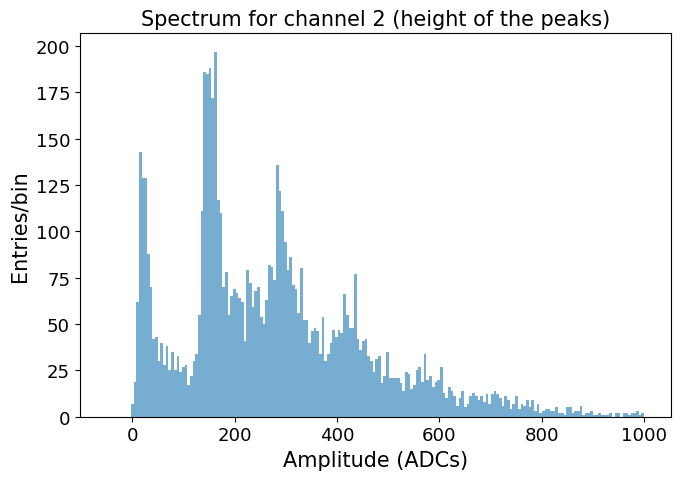

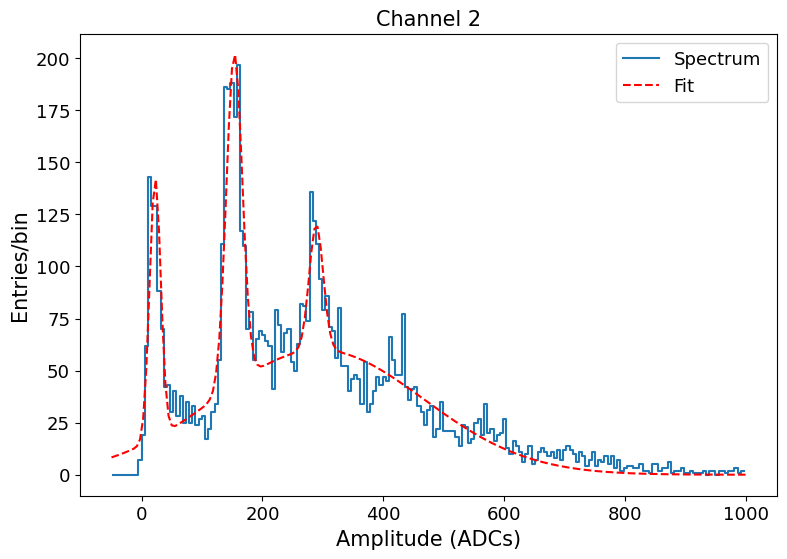

Fitted Parameters:
Peak 1: Amplitude=125.15, Mean=22.33, StdDev=9.25
Peak 2: Amplitude=159.17, Mean=153.34, StdDev=13.22
Peak 3: Amplitude=60.23, Mean=289.04, StdDev=11.60
Peak 4: Amplitude=59.98, Mean=293.69, StdDev=172.91

Fitted Parameters with Errors:
Peak 1: Amplitude=125.15 ± 7.40, Mean=22.33 ± 0.62, StdDev=9.25 ± 0.65
Peak 2: Amplitude=159.17 ± 6.26, Mean=153.34 ± 0.58, StdDev=13.22 ± 0.63
Peak 3: Amplitude=60.23 ± 6.66, Mean=289.04 ± 1.44, StdDev=11.60 ± 1.55
Peak 4: Amplitude=59.98 ± 2.14, Mean=293.69 ± 6.79, StdDev=172.91 ± 6.88


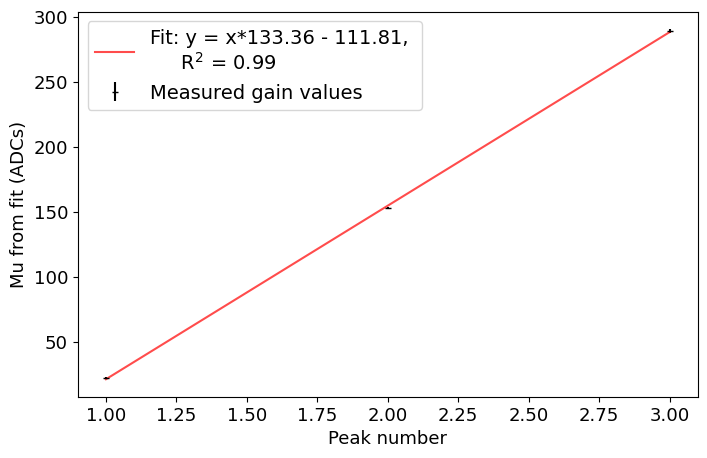

In [175]:
ch   = 2
vled = 7.4
vb   = 55

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=200, range=(-50, 1000), alpha=0.6, label='Channel0')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

initial_guess = [200, 20, 6, 250, 150, 10, 120, 300, 15, 60, 430, 20]  # Initial guess for the parameters
popt, pcov    = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)

plt.step(shift_to_bin_centers(x), y, label='Spectrum')
plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Channel {ch}", fontsize=15)
plt.legend()
plt.show()

print('Fitted Parameters:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f}, Mean={popt[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f}')

perr = np.sqrt(np.diag(pcov))

# Print the fitted parameters with their errors
print("")
print('Fitted Parameters with Errors:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f} ± {perr[i*3]:.2f}, Mean={popt[i*3+1]:.2f} ± {perr[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f} ± {perr[i*3+2]:.2f}')
    

perr = np.sqrt(np.diag(pcov))

all_means     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
all_means_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])

gain = plot_linear_fit(all_means[:3], all_means_err[:3])

In [98]:
all_means, gain

(array([ 21.6509868 , 153.40990012, 288.58172059, 287.83968911]),
 133.4653668913238)

### Fit channel 55

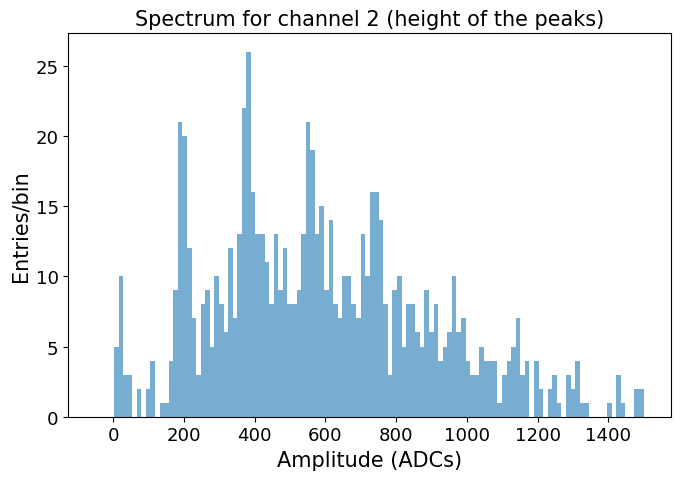

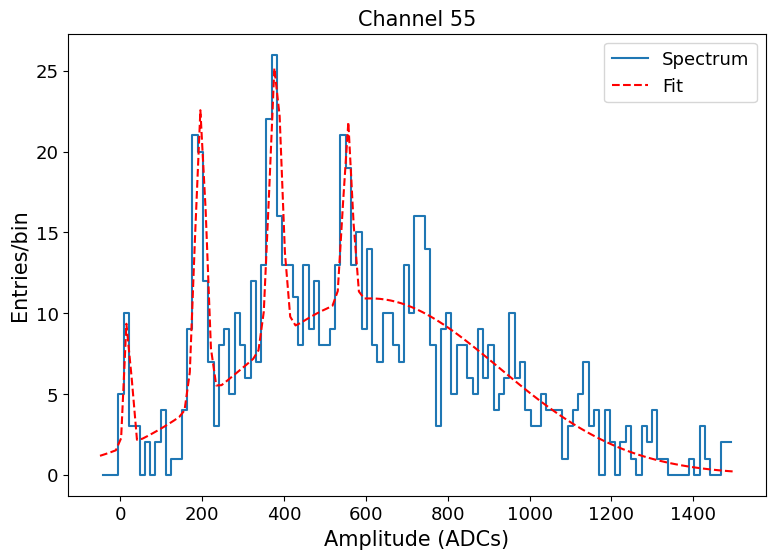

Fitted Parameters:
Peak 1: Amplitude=8.72, Mean=18.46, StdDev=7.32
Peak 2: Amplitude=18.08, Mean=196.04, StdDev=13.05
Peak 3: Amplitude=17.33, Mean=379.27, StdDev=14.50
Peak 4: Amplitude=11.15, Mean=555.87, StdDev=10.77
Peak 5: Amplitude=10.91, Mean=612.33, StdDev=313.47

Fitted Parameters with Errors:
Peak 1: Amplitude=8.72 ± 2.94, Mean=18.46 ± 3.67, StdDev=7.32 ± 3.07
Peak 2: Amplitude=18.08 ± 2.09, Mean=196.04 ± 1.71, StdDev=13.05 ± 1.80
Peak 3: Amplitude=17.33 ± 1.98, Mean=379.27 ± 1.88, StdDev=14.50 ± 1.96
Peak 4: Amplitude=11.15 ± 2.35, Mean=555.87 ± 2.49, StdDev=10.77 ± 2.78
Peak 5: Amplitude=10.91 ± 0.48, Mean=612.33 ± 16.04, StdDev=313.47 ± 15.98


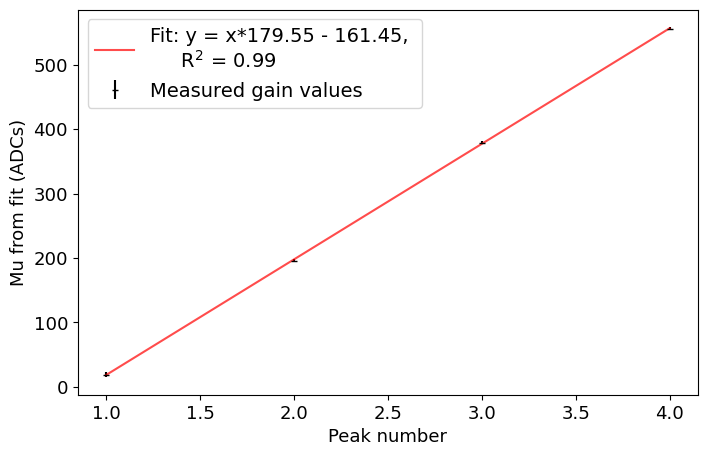

In [231]:
ch   = 55
vled = 6.6
vb   = 56

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=120, range=(-50, 1500), alpha=0.6, label='Channel0')
#plt.axvline(x=740, color='r')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

initial_guess = [200, 20, 10, 250, 200, 15, 120, 400, 15, 60, 550, 15, 15, 740, 10]  # Initial guess for the parameters
popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)

plt.step(shift_to_bin_centers(x), y, label='Spectrum')
plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Channel {ch}", fontsize=15)
plt.legend()
plt.show()

print('Fitted Parameters:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f}, Mean={popt[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f}')

perr = np.sqrt(np.diag(pcov))

# Print the fitted parameters with their errors
print("")
print('Fitted Parameters with Errors:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f} ± {perr[i*3]:.2f}, Mean={popt[i*3+1]:.2f} ± {perr[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f} ± {perr[i*3+2]:.2f}')
    

perr = np.sqrt(np.diag(pcov))

all_means     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
all_means_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])

gain = plot_linear_fit(all_means[:4], all_means_err[:4])

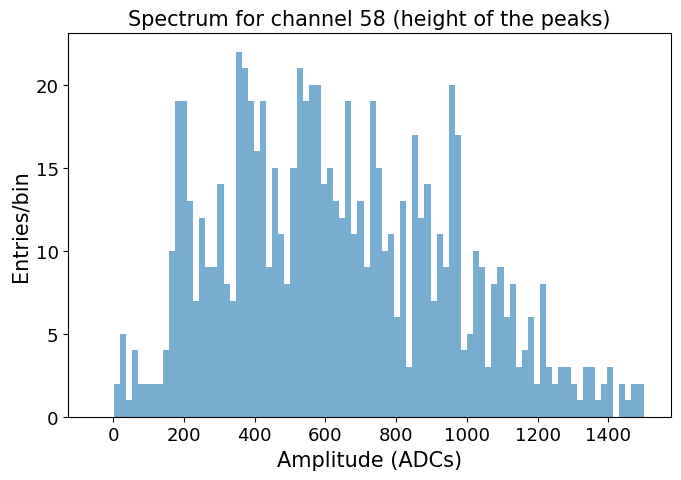

In [255]:
ch   = 58
vled = 6.6
vb   = 56

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=90, range=(-50, 1500), alpha=0.6, label='Channel0')
#plt.axvline(x=740, color='r')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {ch} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

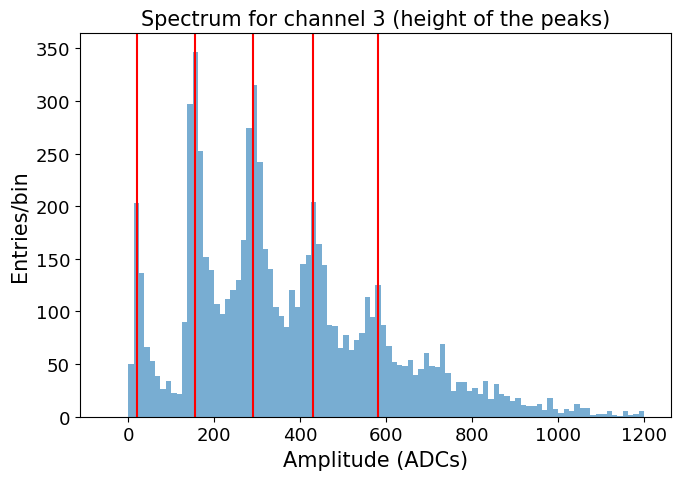

In [281]:
ch   = 3
vled = 7.6
vb   = 55

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=100, range=(-50, 1200), alpha=0.6, label='Channel0')
plt.axvline(x=20, color='r')
plt.axvline(x=155, color='r')
plt.axvline(x=290, color='r')
plt.axvline(x=430, color='r')
plt.axvline(x=580, color='r')
#plt.axvline(x=740, color='r')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {ch} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

### Automatize the fitting process:

In [343]:
def extract_gain_and_mean(channel, vbias, vled, bins, prange, initial_guess):
    
    data = all_max_data[channel_v(channel=channel, vbias=vbias, vled=vled)]
    
    print()
    print('------------------------------------------------------------------------------------------')
    print(f'-------    Channel {channel}, Vbias = {vbias} V, VLED = {vled}   ------------------------')
    print('------------------------------------------------------------------------------------------')
    print()

    plt.figure(figsize=(7, 5))
    y, x, _ = plt.hist(data, bins=bins, range=prange, alpha=0.6, label=f'Channel{channel}')
    #plt.axvline(x=740, color='r')
    plt.xlabel('Amplitude (ADCs)', fontsize=15)
    plt.ylabel('Entries/bin',      fontsize=15)
    plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
    plt.show()
    
    popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)
    
    plt.figure(figsize=(7, 5))
    plt.step(shift_to_bin_centers(x), y, label='Spectrum')
    plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
    plt.xlabel('Amplitude (ADCs)', fontsize=15)
    plt.ylabel('Entries/bin',      fontsize=15)
    plt.title(f"Channel {channel}",     fontsize=15)
    plt.legend()
    plt.show()
    
    # print('Fitted Parameters:')
    # for i in range(len(popt)//3):
    #     print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f}, Mean={popt[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f}')

    perr = np.sqrt(np.diag(pcov))
    
    ## Print the fitted parameters with their errors
    # print("")
    # print('Fitted Parameters with Errors:')
    # for i in range(len(popt)//3):
    #     print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f} ± {perr[i*3]:.2f}, Mean={popt[i*3+1]:.2f} ± {perr[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f} ± {perr[i*3+2]:.2f}')
    
    means_ch     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
    means_ch_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])
    
    gain_ch = plot_linear_fit(means_ch[:4], means_ch_err[:4])
    
    return gain_ch, means_ch

In [347]:
all_gains = {}
all_means = {}


------------------------------------------------------------------------------------------
-------    Channel 1, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



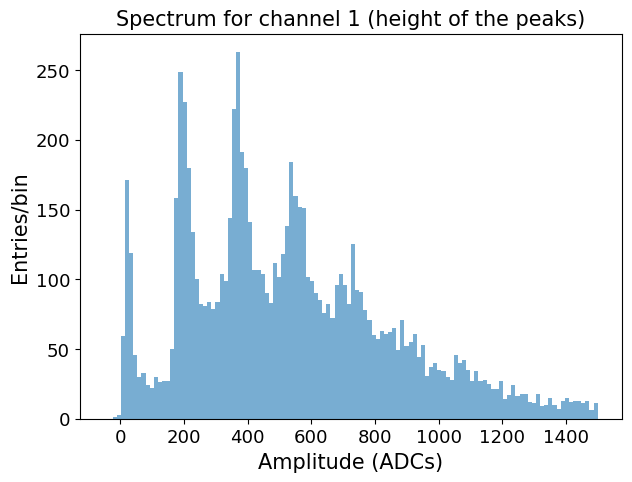

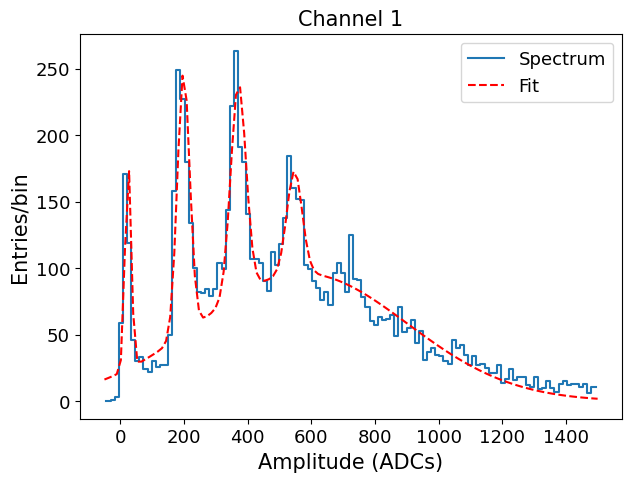

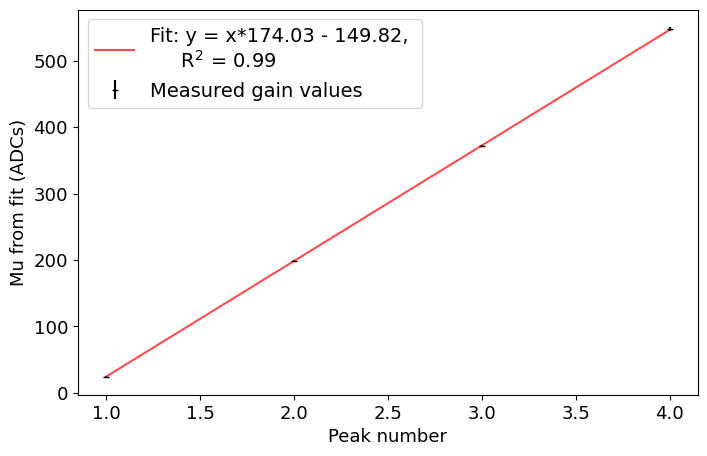


------------------------------------------------------------------------------------------
-------    Channel 2, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



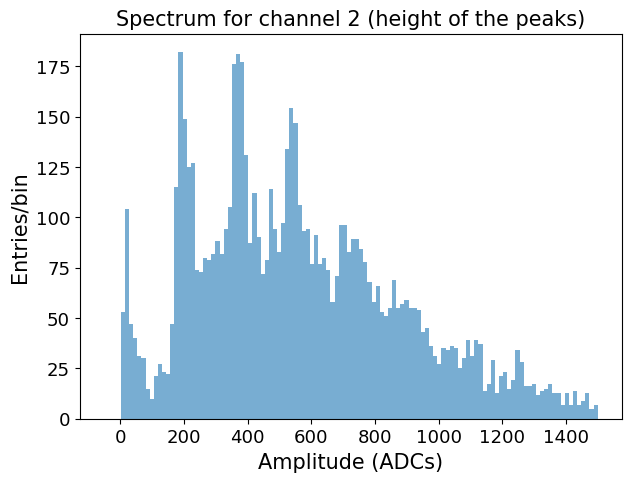

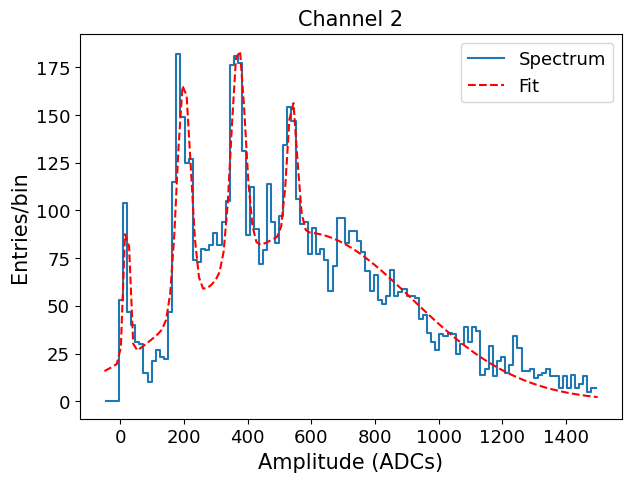

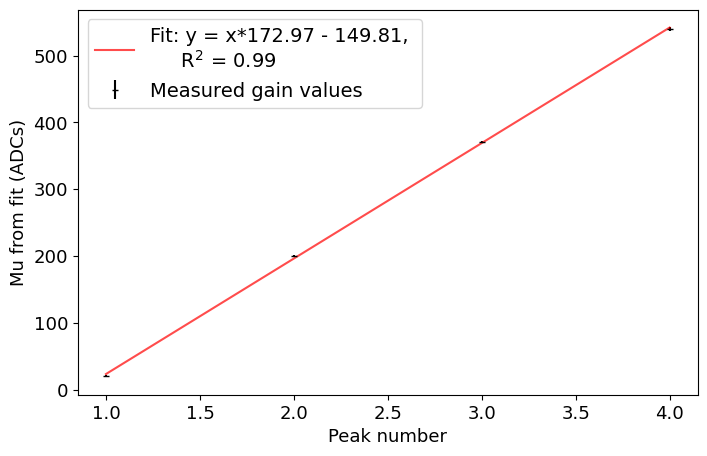


------------------------------------------------------------------------------------------
-------    Channel 3, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



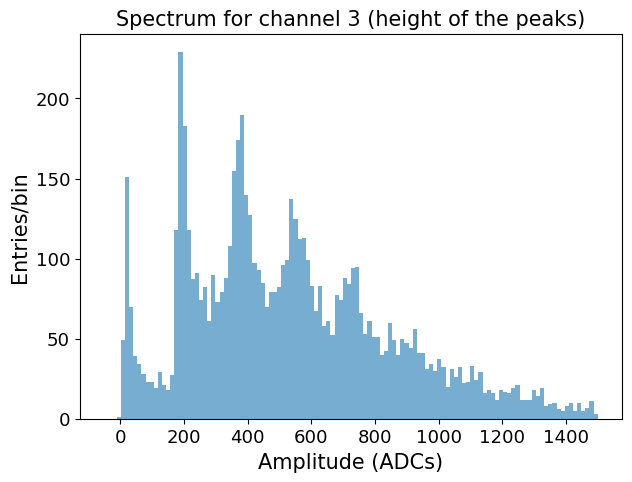

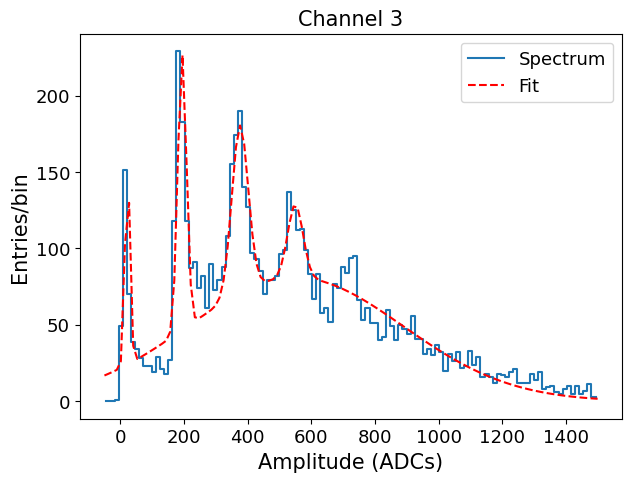

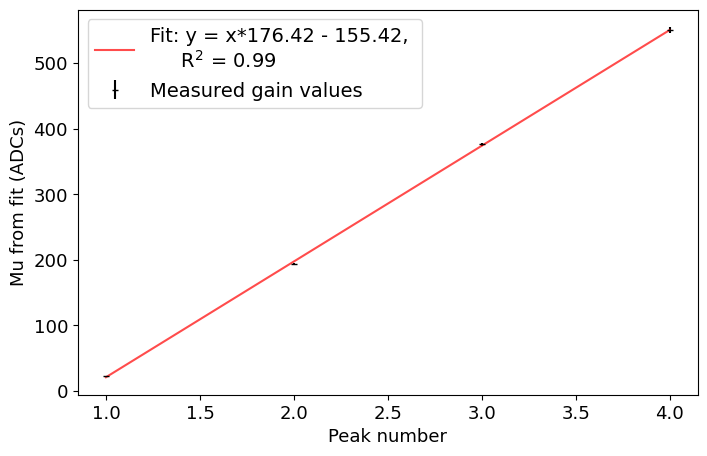


------------------------------------------------------------------------------------------
-------    Channel 55, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



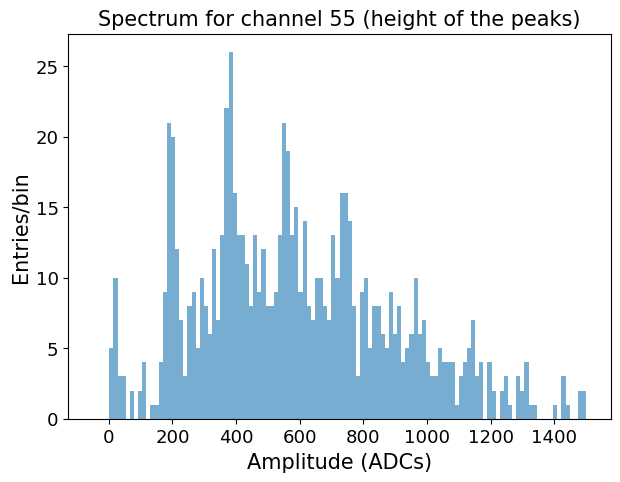

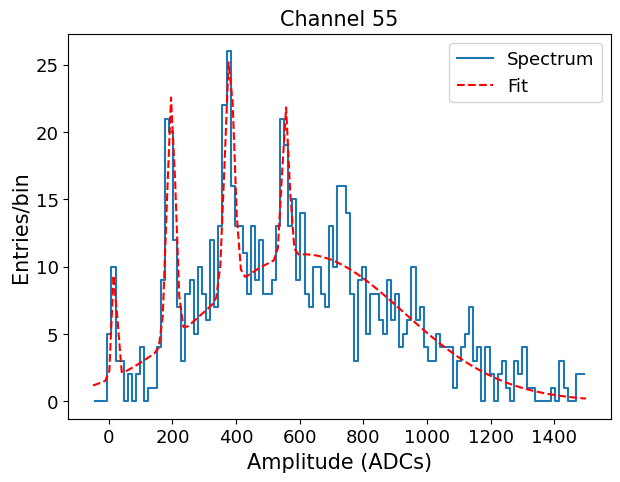

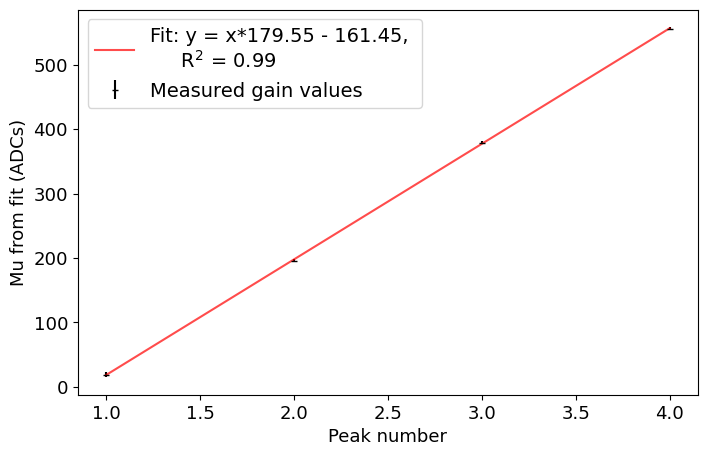


------------------------------------------------------------------------------------------
-------    Channel 56, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



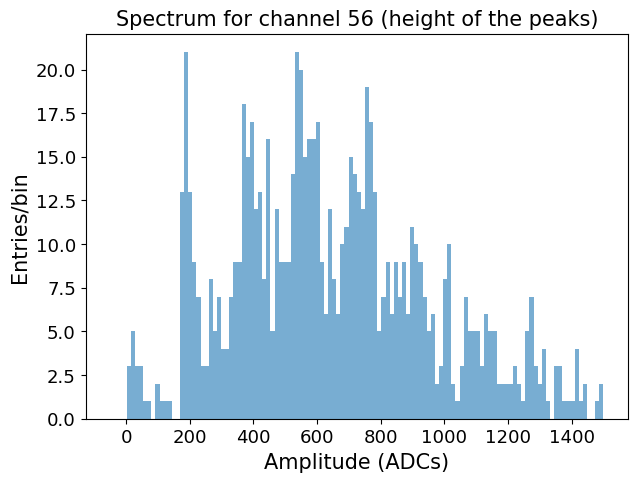

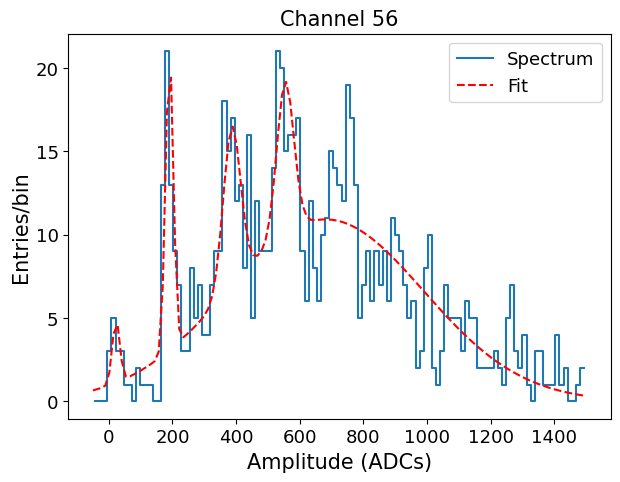

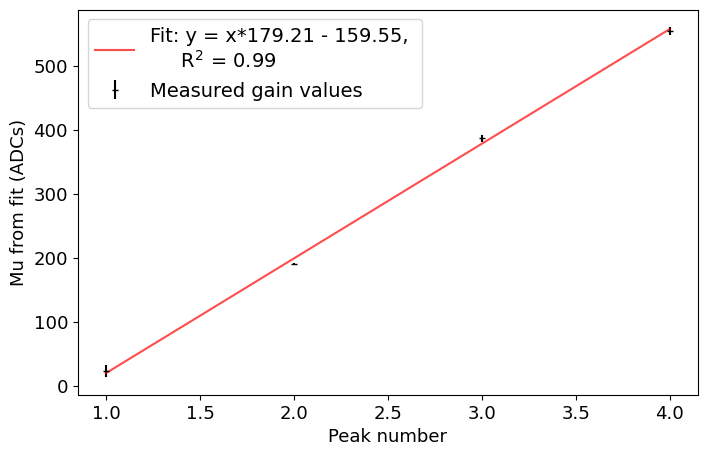


------------------------------------------------------------------------------------------
-------    Channel 57, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



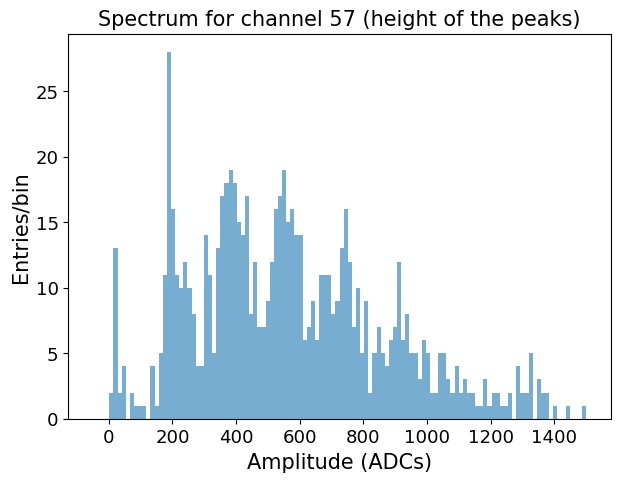

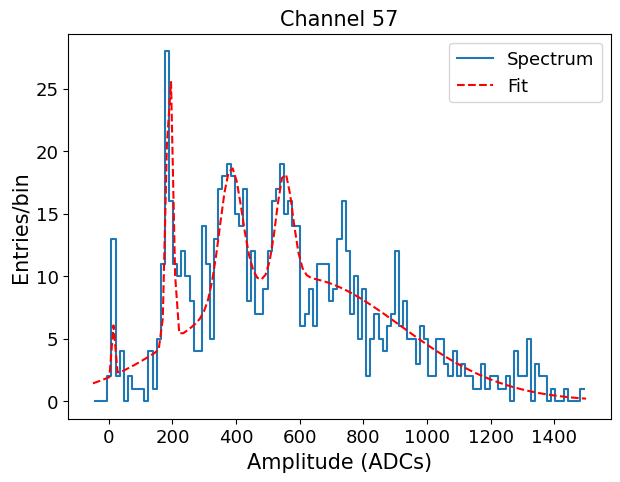

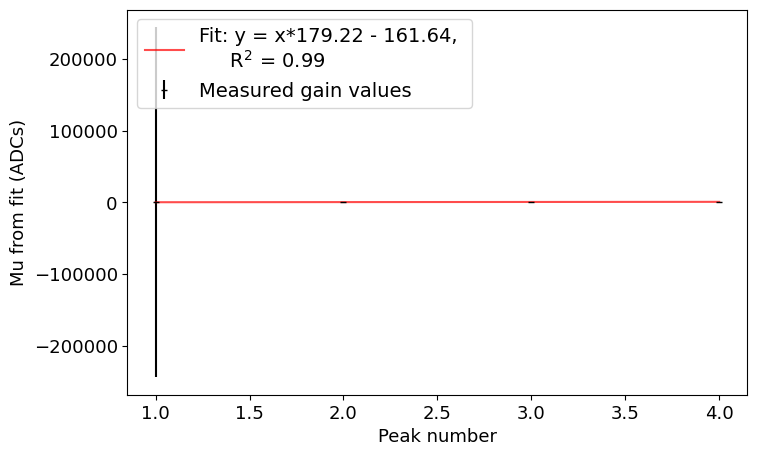


------------------------------------------------------------------------------------------
-------    Channel 58, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



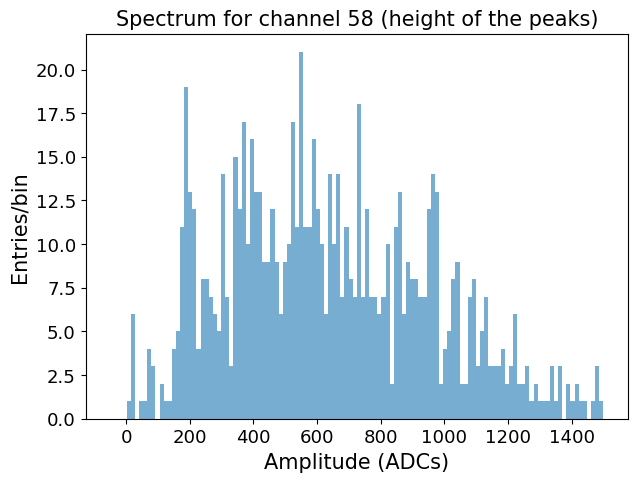

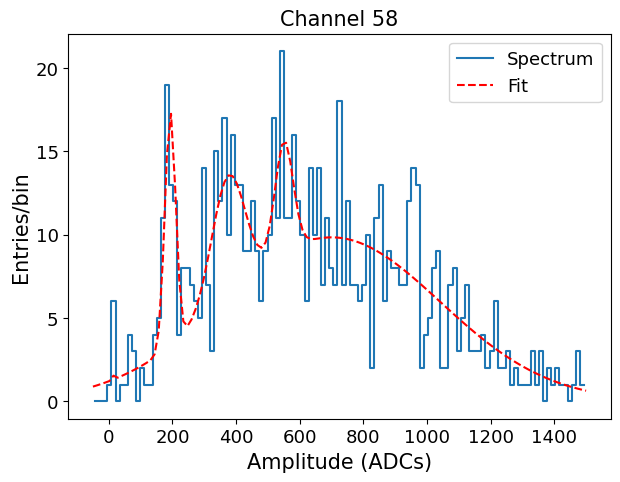

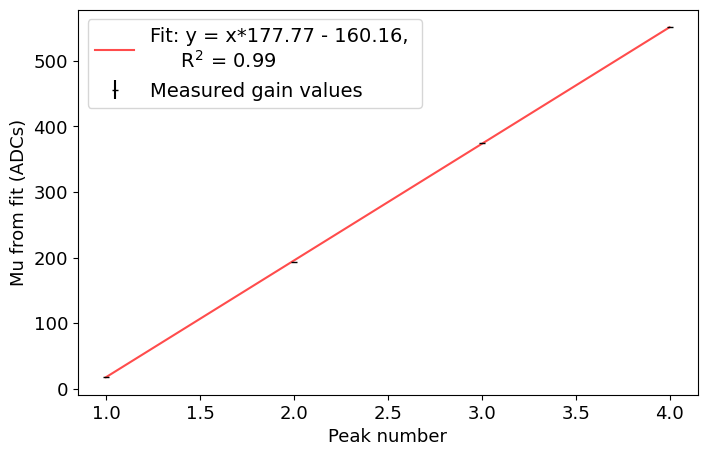


------------------------------------------------------------------------------------------
-------    Channel 59, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



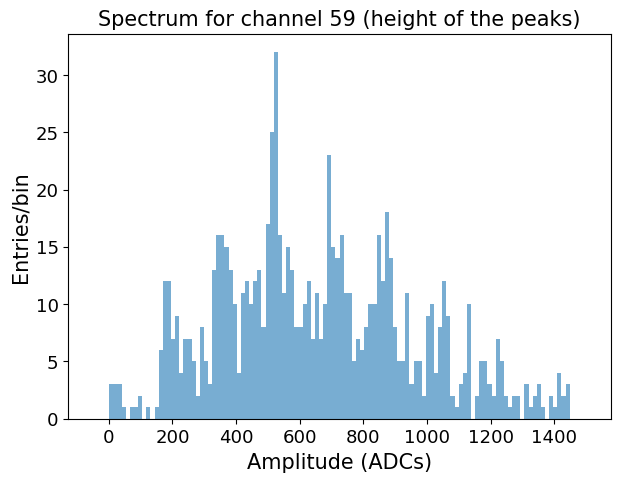

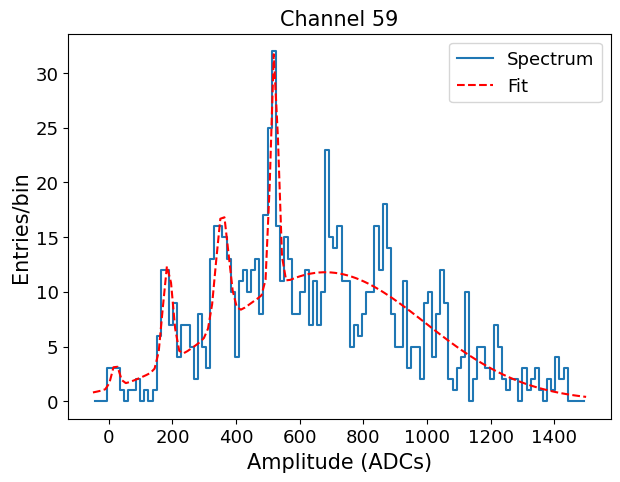

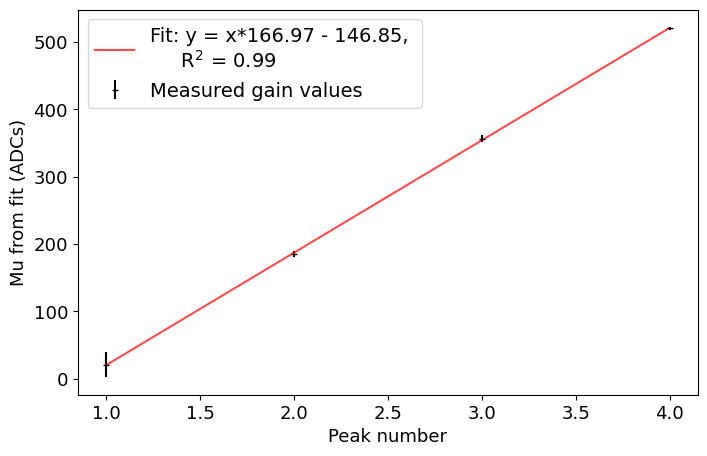


------------------------------------------------------------------------------------------
-------    Channel 60, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



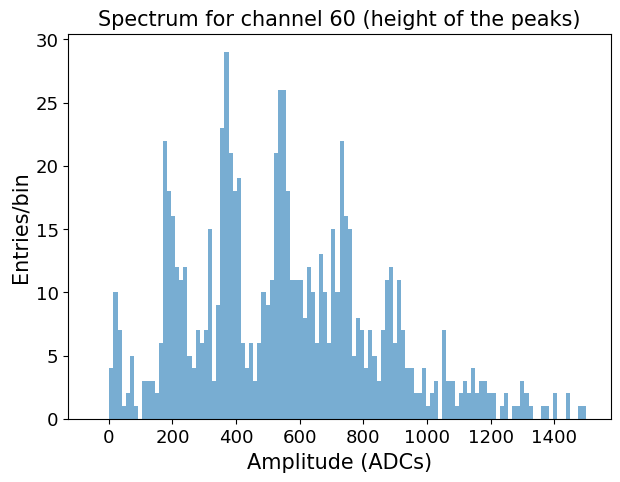

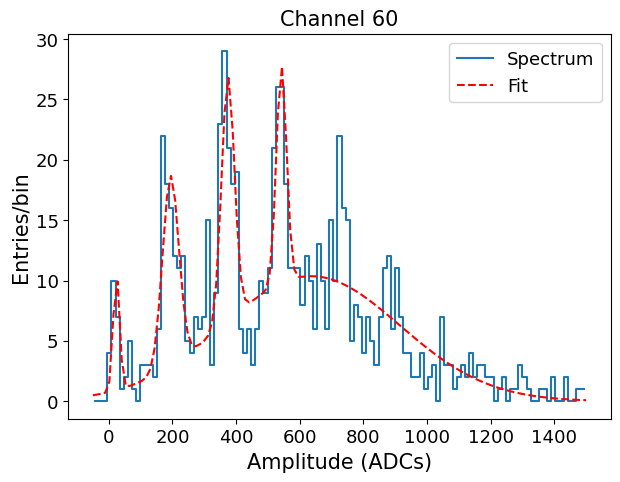

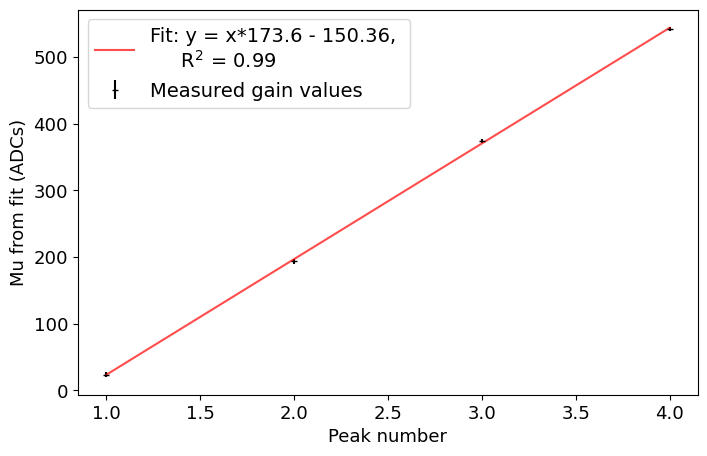


------------------------------------------------------------------------------------------
-------    Channel 64, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



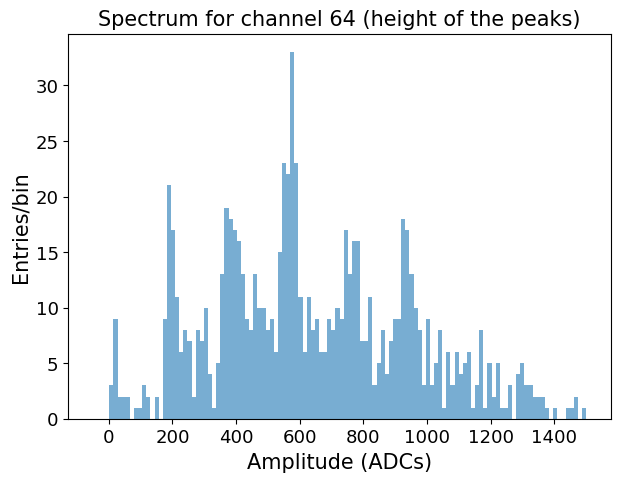

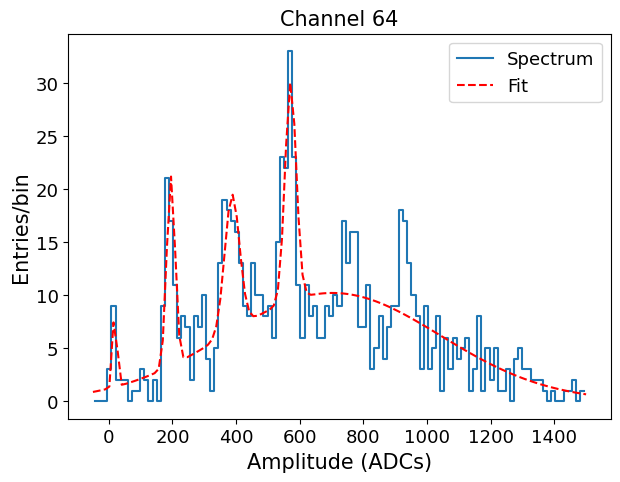

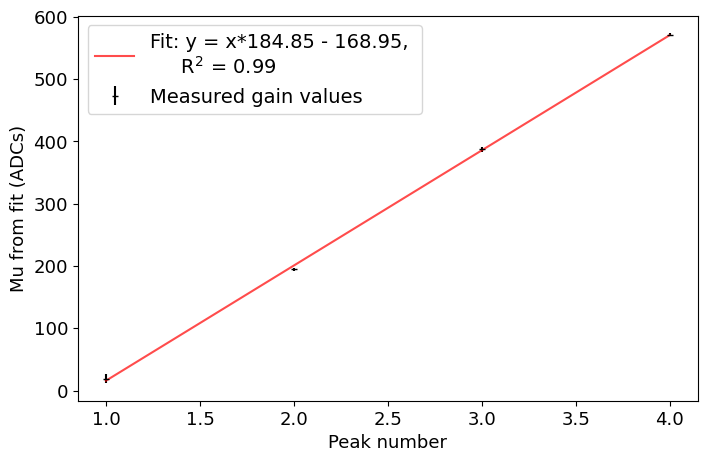


------------------------------------------------------------------------------------------
-------    Channel 65, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



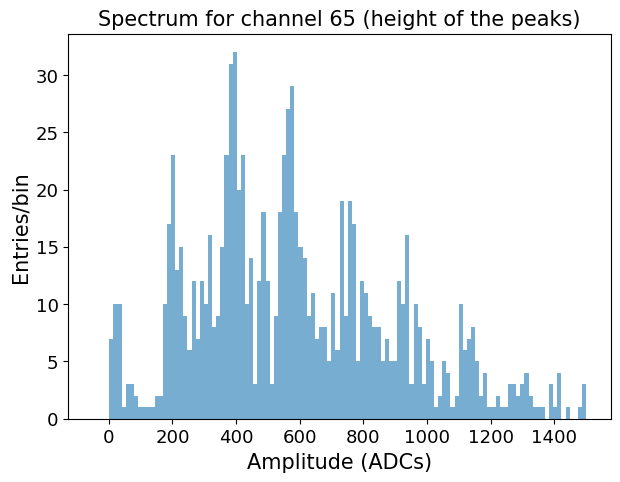

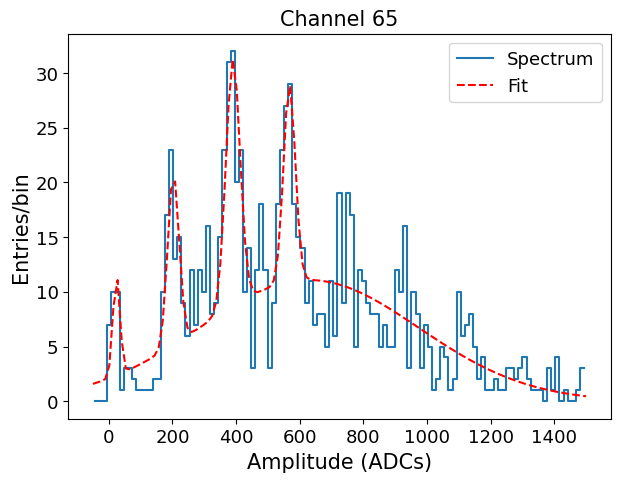

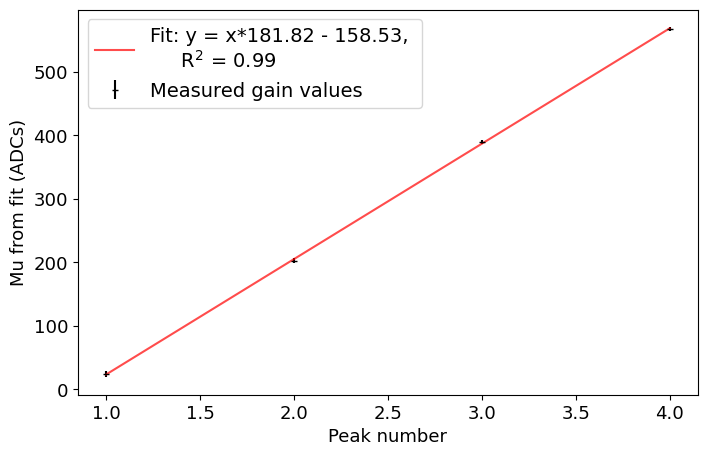


------------------------------------------------------------------------------------------
-------    Channel 66, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



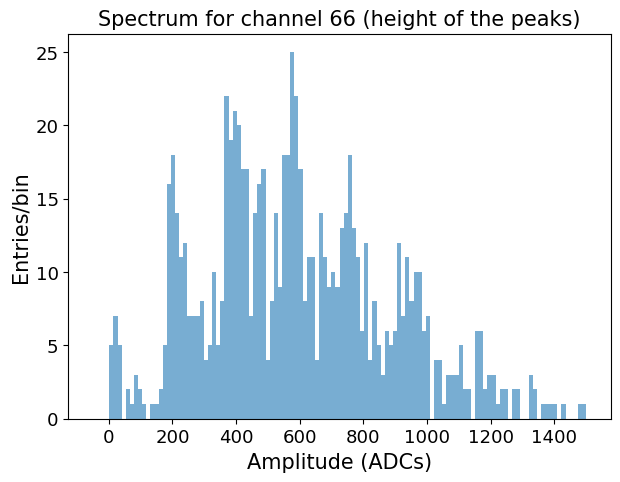

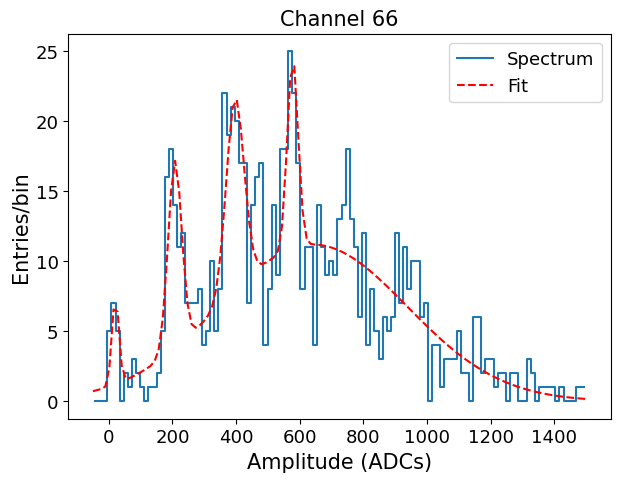

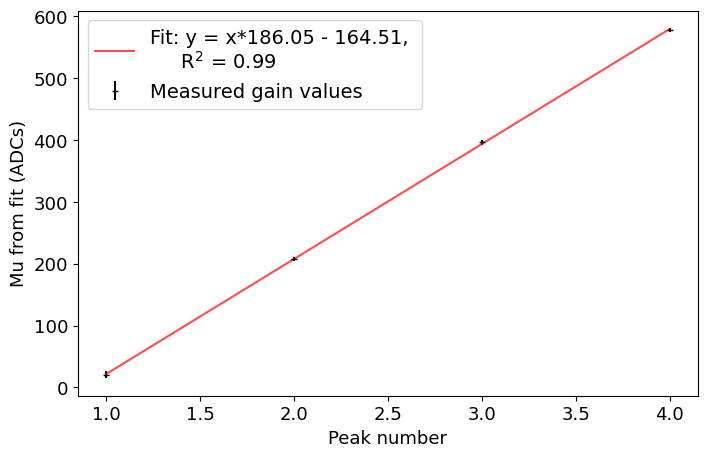

In [348]:
vb = 56
for ch, vled in zip(channels, vleds0):
    vl = vled + 0.6
    initial_guess  = [200, 20, 10, 250, 200, 15, 120, 400, 15, 60, 550, 15, 15, 740, 10]
    gain, ch_means = extract_gain_and_mean(channel       = ch,
                                           vbias         = vb,
                                           vled          = vl,
                                           bins          = 120,
                                           prange        = (-50, 1500),
                                           initial_guess = initial_guess)
    
    all_gains[channel_v(channel=ch, vbias=vb, vled=vl)] = gain
    all_means[channel_v(channel=ch, vbias=vb, vled=vl)] = ch_means


------------------------------------------------------------------------------------------
-------    Channel 1, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



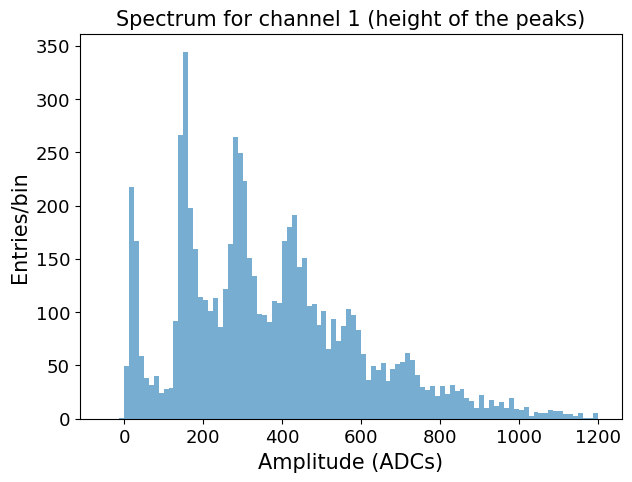

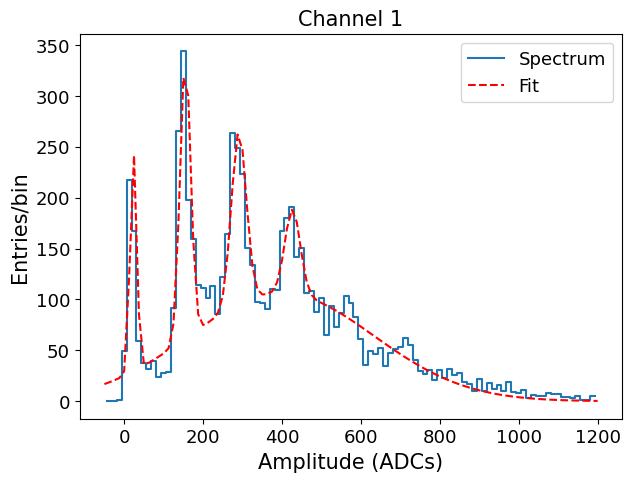

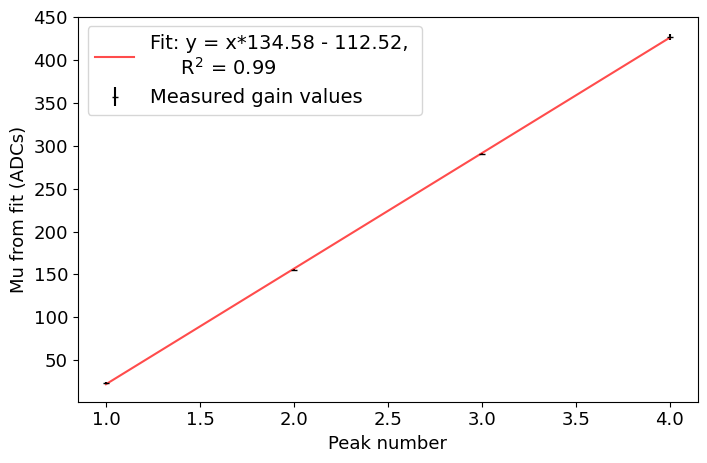


------------------------------------------------------------------------------------------
-------    Channel 2, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



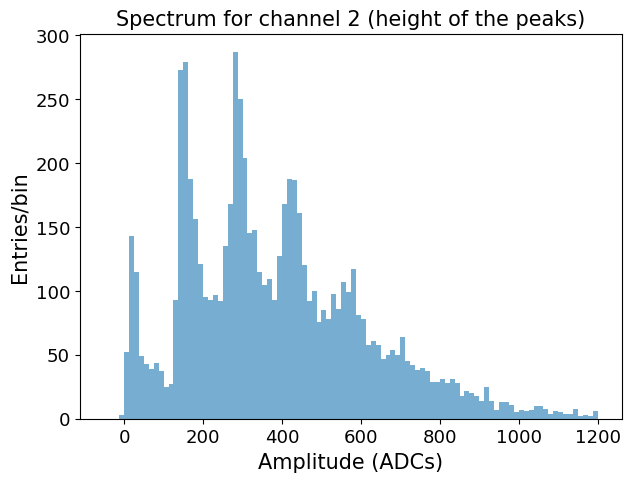

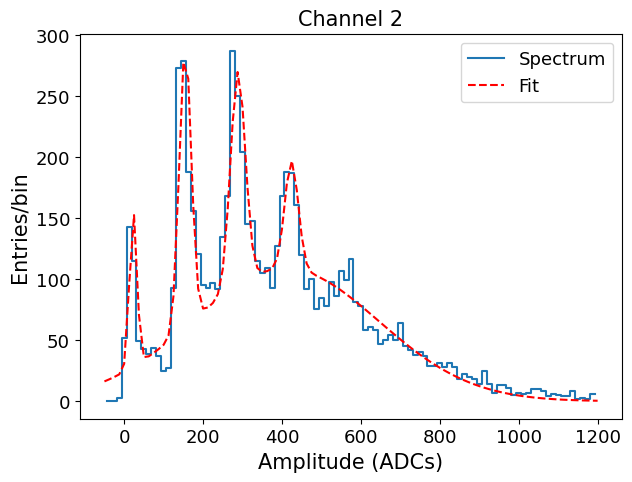

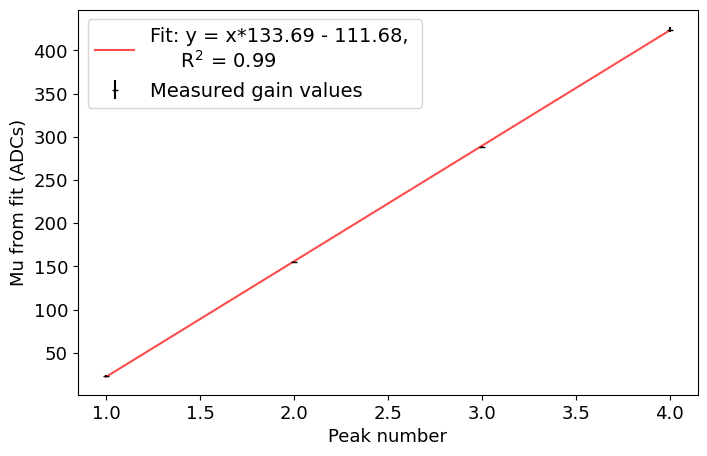


------------------------------------------------------------------------------------------
-------    Channel 3, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



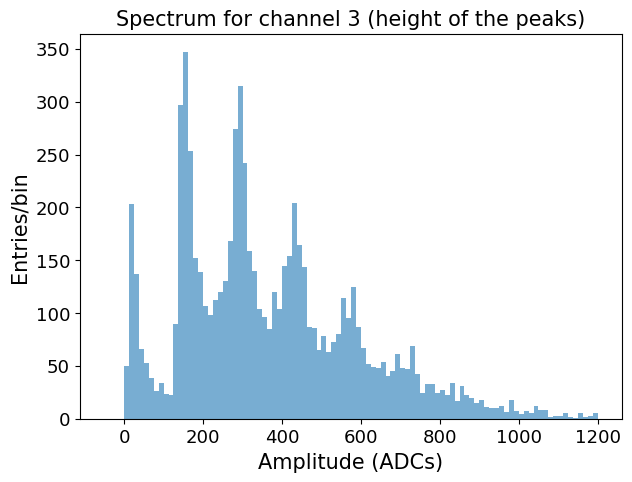

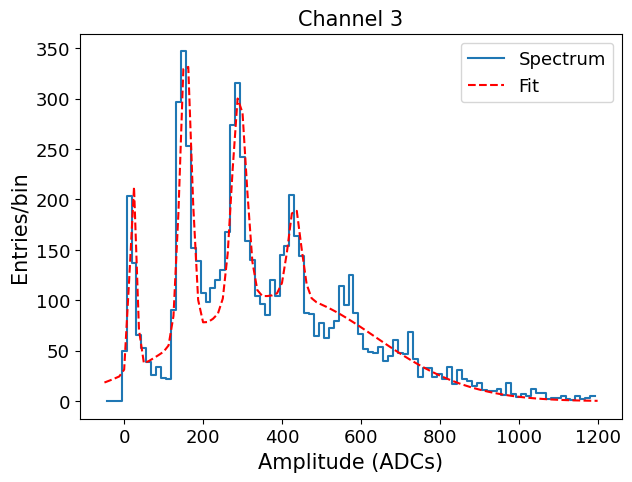

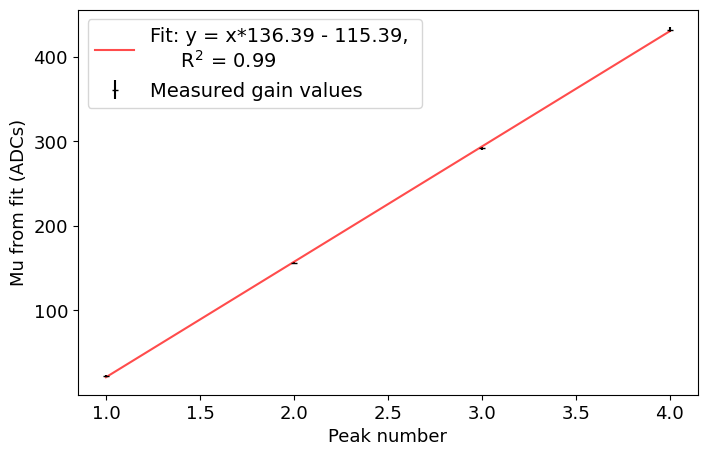


------------------------------------------------------------------------------------------
-------    Channel 55, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



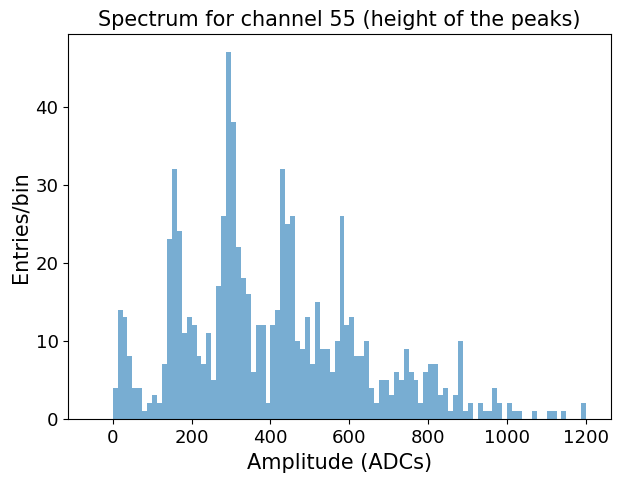

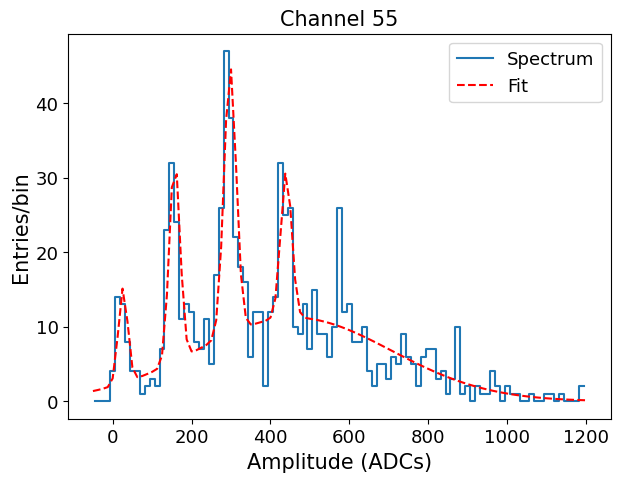

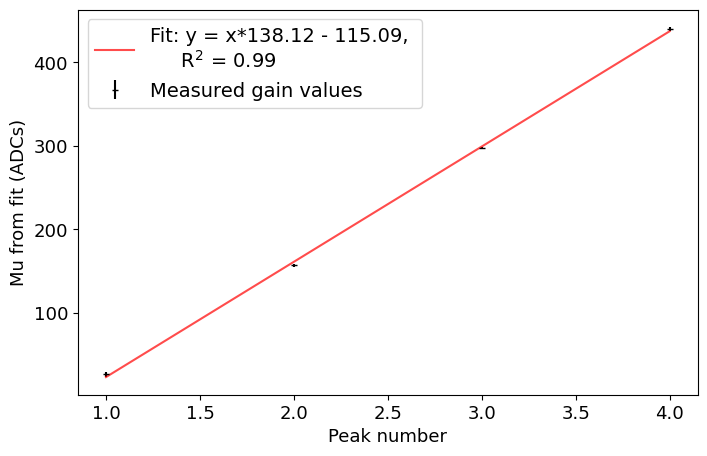


------------------------------------------------------------------------------------------
-------    Channel 56, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



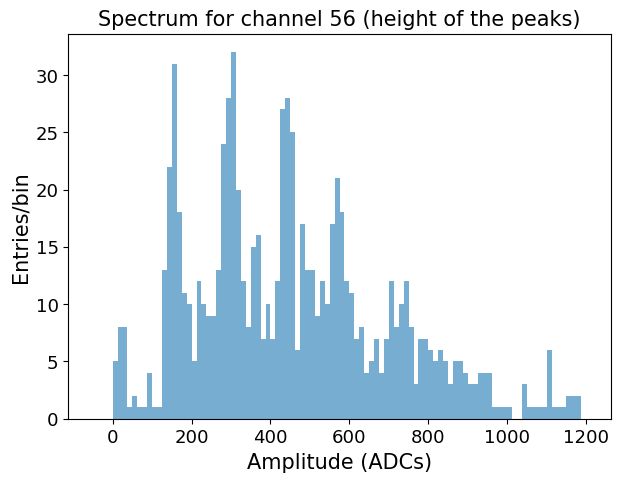

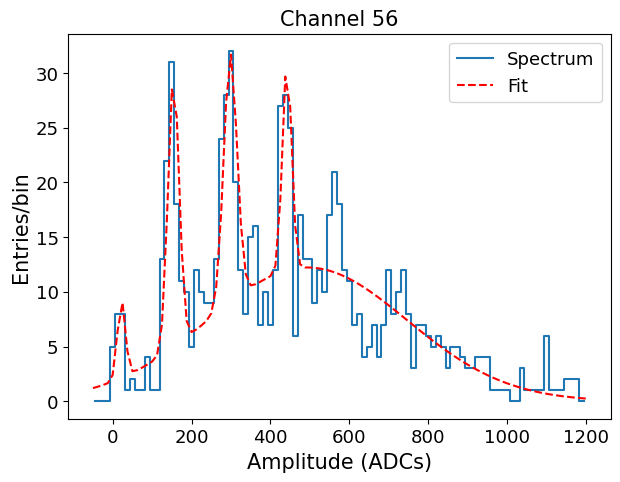

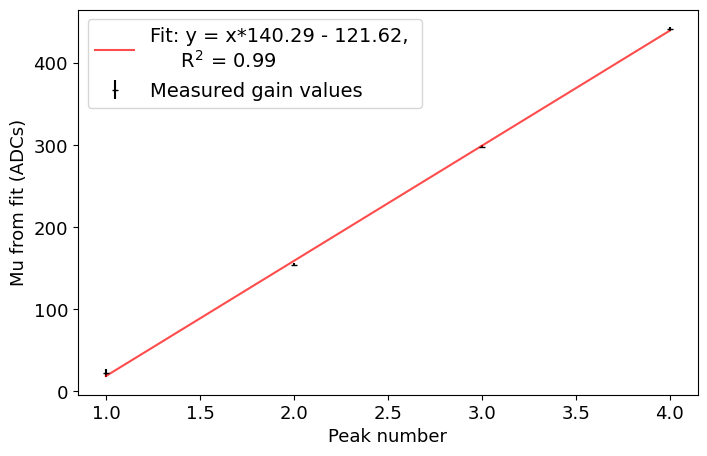


------------------------------------------------------------------------------------------
-------    Channel 57, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



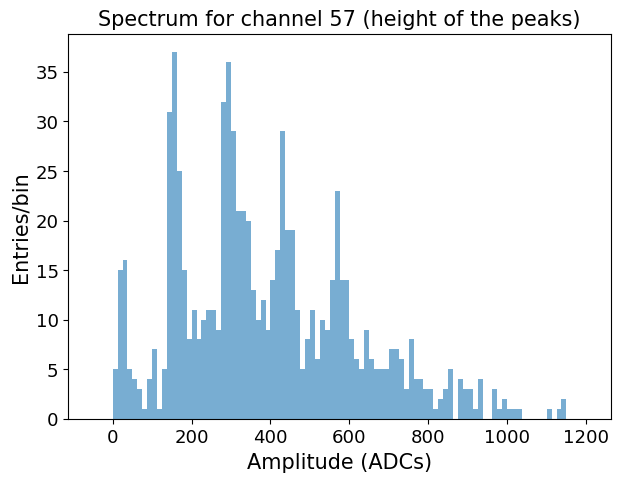

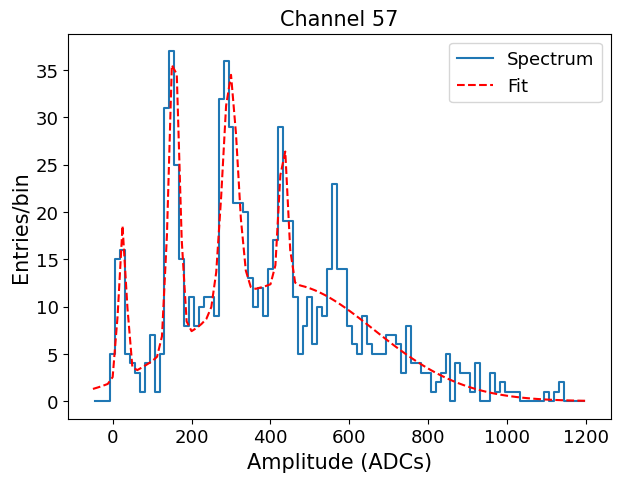

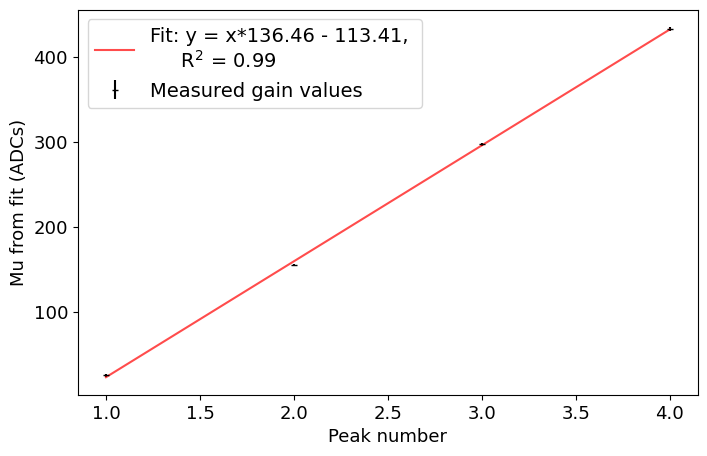


------------------------------------------------------------------------------------------
-------    Channel 58, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



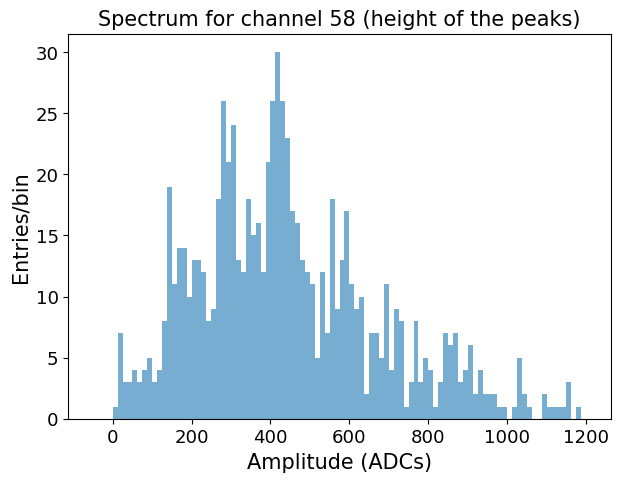

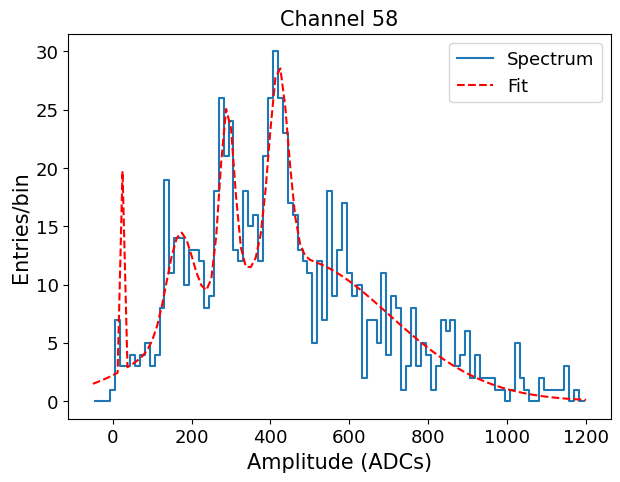

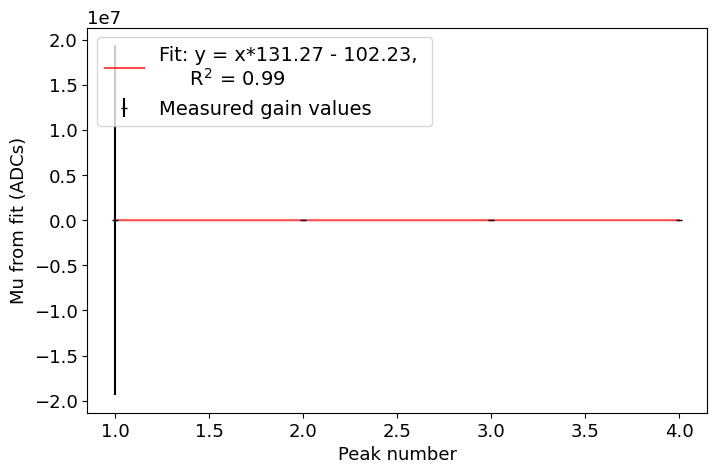


------------------------------------------------------------------------------------------
-------    Channel 59, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



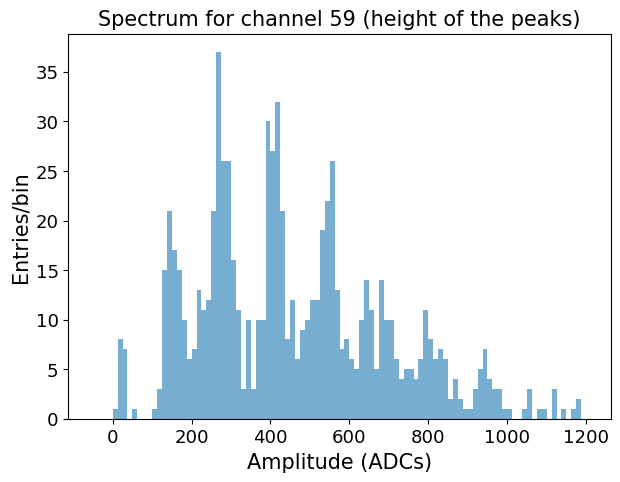

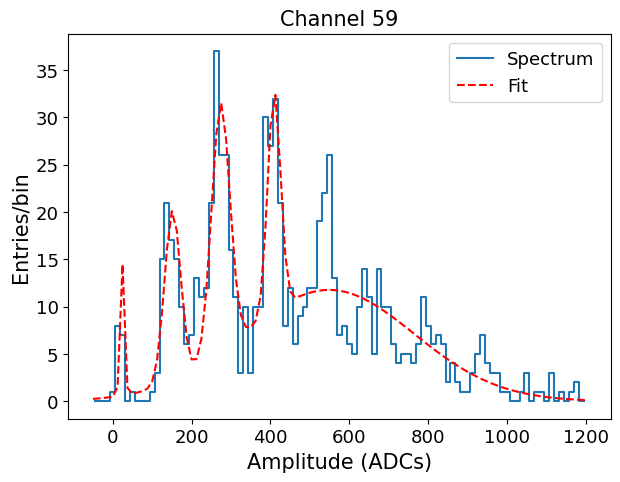

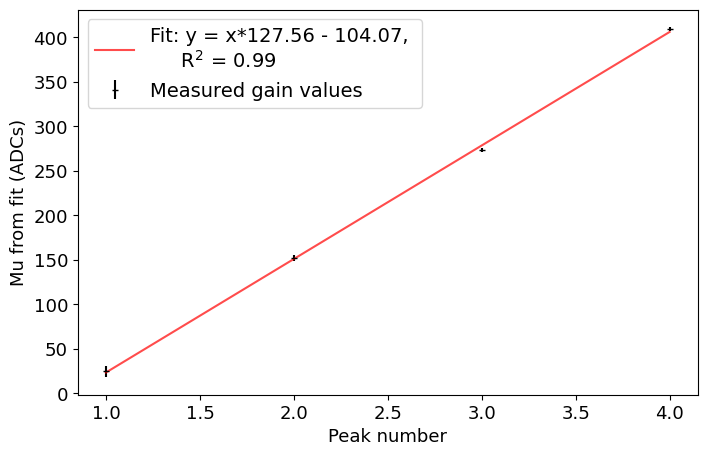


------------------------------------------------------------------------------------------
-------    Channel 60, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



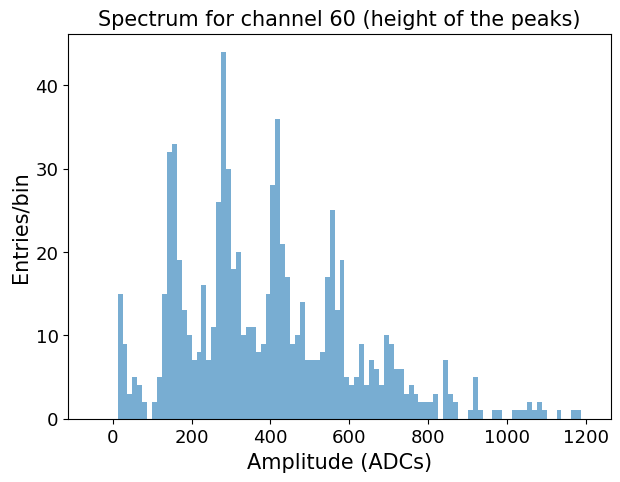

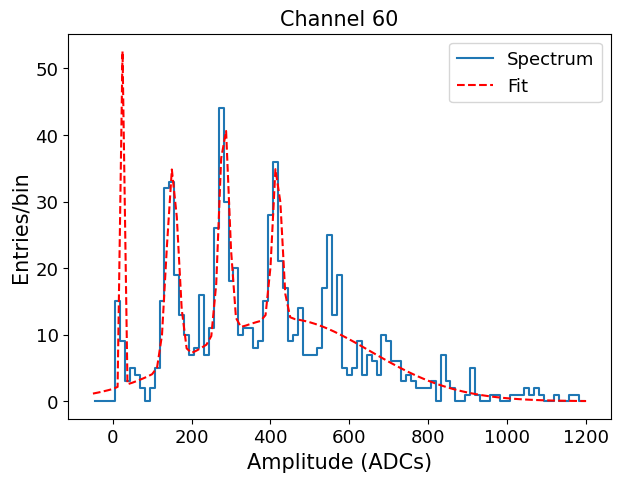

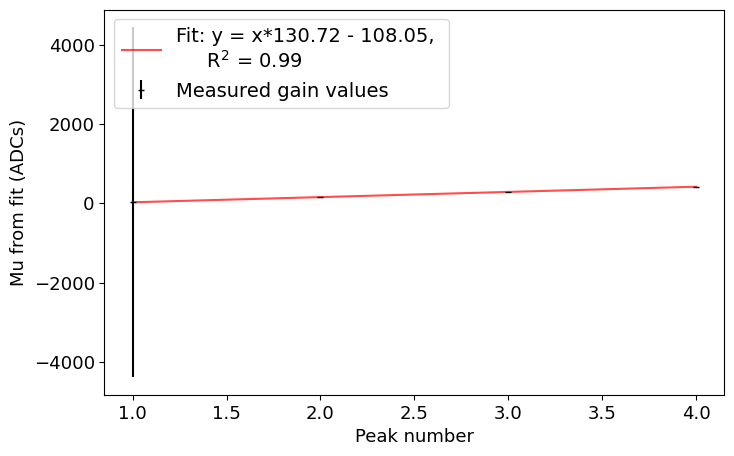


------------------------------------------------------------------------------------------
-------    Channel 64, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



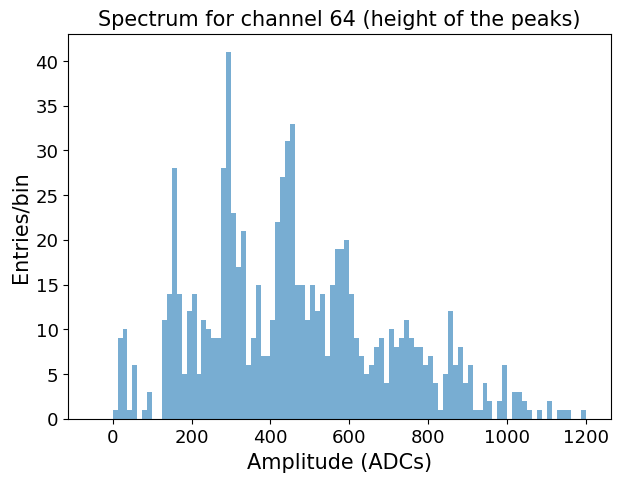

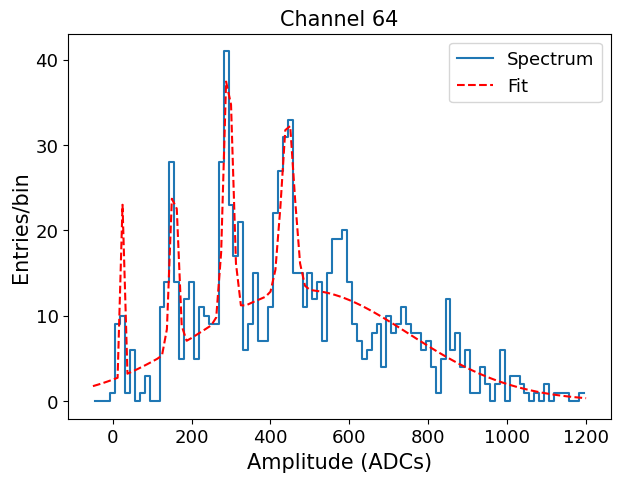

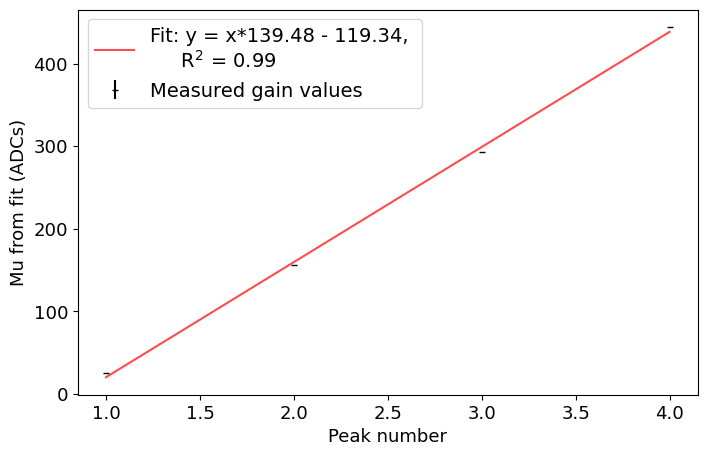


------------------------------------------------------------------------------------------
-------    Channel 65, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



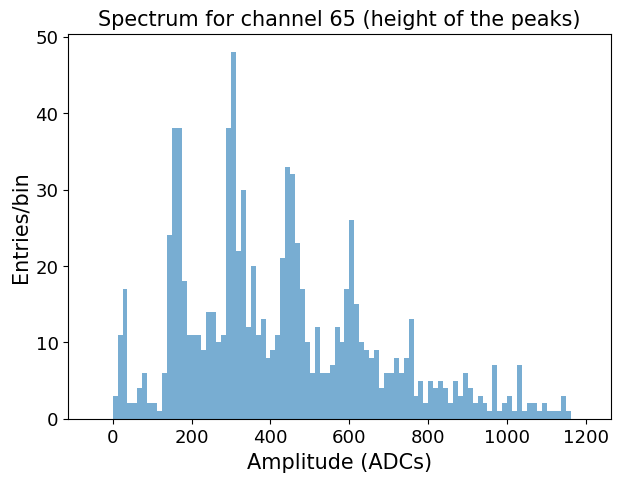

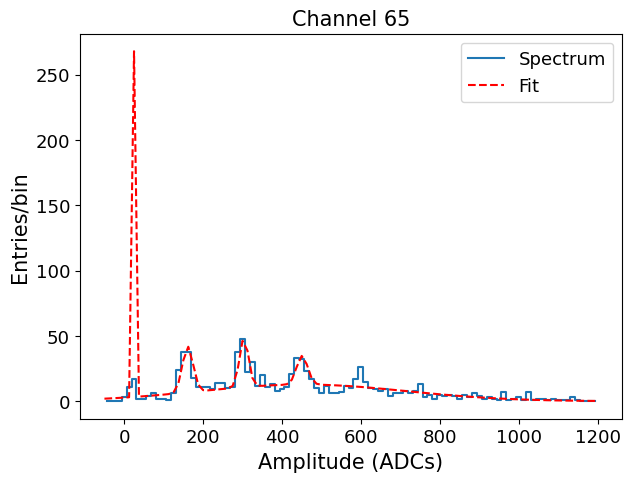

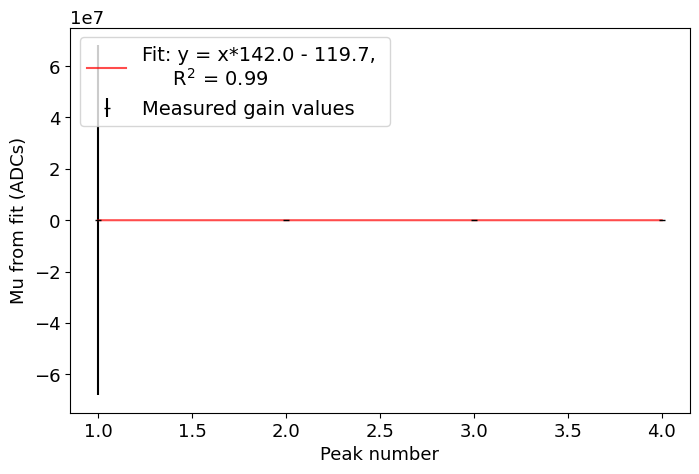


------------------------------------------------------------------------------------------
-------    Channel 66, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



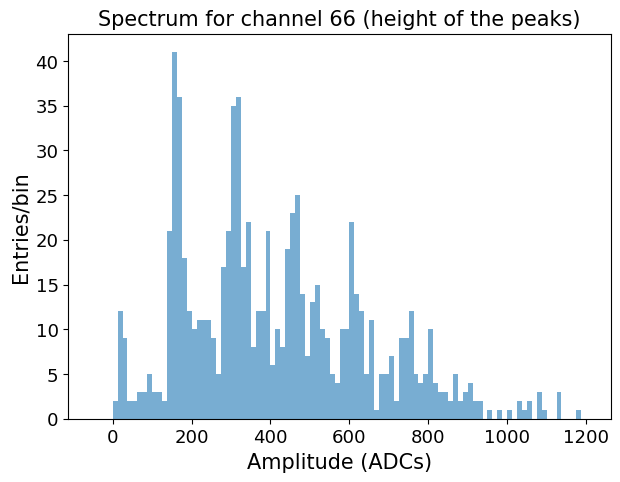

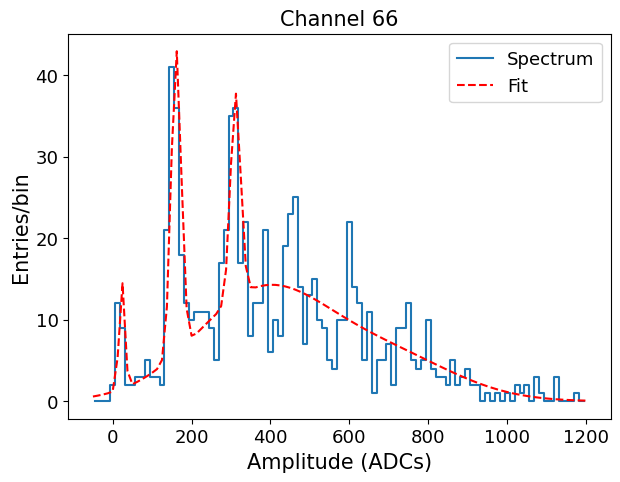

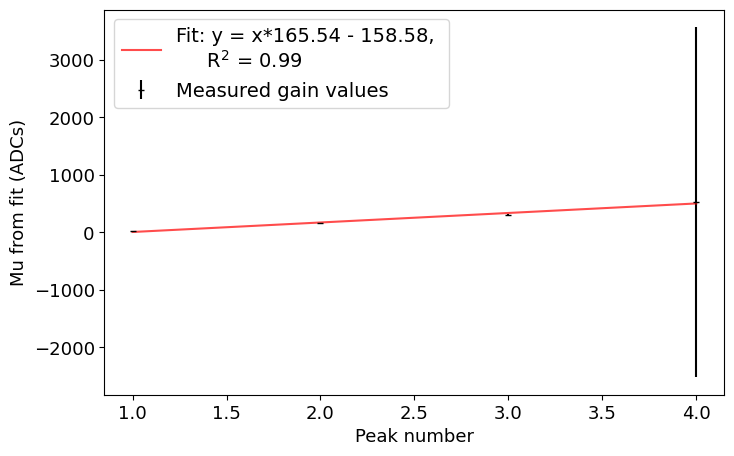

In [349]:
vb = 55
for ch, vled in zip(channels, vleds0):
    vl = vled + 0.6
    initial_guess = [200, 20, 10, 250, 155, 15, 120, 290, 15, 60, 430, 15, 15, 580, 10]
    gain, ch_means = extract_gain_and_mean(channel       = ch,
                                           vbias         = vb,
                                           vled          = vl,
                                           bins          = 100,
                                           prange        = (-50, 1200),
                                           initial_guess = initial_guess)
    all_gains[channel_v(channel=ch, vbias=vb, vled=vl)] = gain
    all_means[channel_v(channel=ch, vbias=vb, vled=vl)] = ch_means

In [283]:
all_gains

{channel(channel=1, vbias=56, vled=7.6): 174.0310783309319,
 channel(channel=2, vbias=56, vled=7.6): 172.9659915183511,
 channel(channel=3, vbias=56, vled=7.6): 176.42412688156938,
 channel(channel=55, vbias=56, vled=6.6): 179.54566930515443,
 channel(channel=56, vbias=56, vled=6.6): 179.2100656101615,
 channel(channel=57, vbias=56, vled=6.6): 179.218145635049,
 channel(channel=58, vbias=56, vled=6.6): 177.77043258074494,
 channel(channel=59, vbias=56, vled=6.6): 166.97475842493634,
 channel(channel=60, vbias=56, vled=6.6): 173.60047227393528,
 channel(channel=64, vbias=56, vled=6.6): 184.8525647026398,
 channel(channel=65, vbias=56, vled=6.6): 181.81694523570545,
 channel(channel=66, vbias=56, vled=6.6): 186.0452881674908,
 channel(channel=1, vbias=55, vled=7.6): 134.57801821068307,
 channel(channel=2, vbias=55, vled=7.6): 133.68639541659417,
 channel(channel=3, vbias=55, vled=7.6): 136.39412142752434,
 channel(channel=55, vbias=55, vled=6.6): 138.11533158918587,
 channel(channel=56, 

In [287]:
gains_vb55 = np.array([all_gains[channel_v(channel=ch, vbias=55, vled=0.6+vl)] for ch,vl in zip(channels, vleds0)])
gains_vb56 = np.array([all_gains[channel_v(channel=ch, vbias=56, vled=0.6+vl)] for ch,vl in zip(channels, vleds0)])

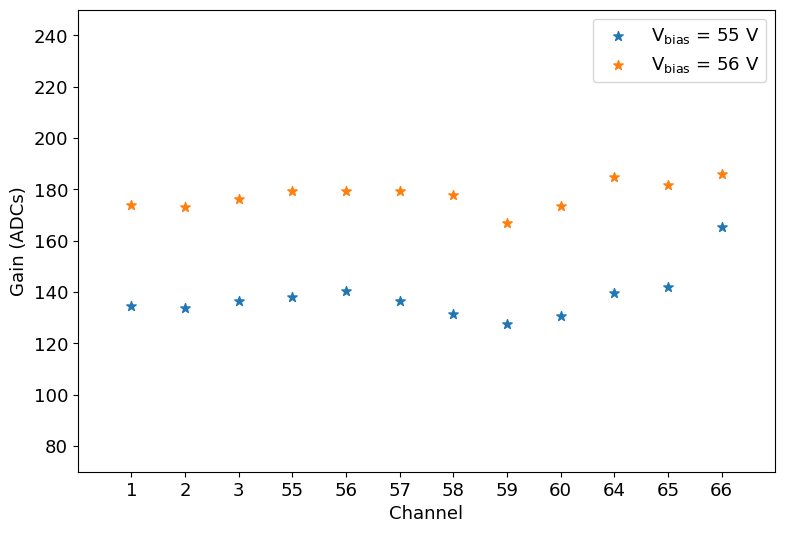

In [324]:
plt.scatter(range(len(gains_vb55)), gains_vb55, marker='*', s=50, label='V$_{\mathrm{bias}}$ = 55 V')
plt.scatter(range(len(gains_vb56)), gains_vb56, marker='*', s=50, label='V$_{\mathrm{bias}}$ = 56 V')
plt.xlim(-1, 12)
plt.ylim(70, 250)
plt.ylabel('Gain (ADCs)')
plt.xlabel('Channel')
plt.xticks(range(len(gains_vb55)), channels)
plt.legend()
plt.show()

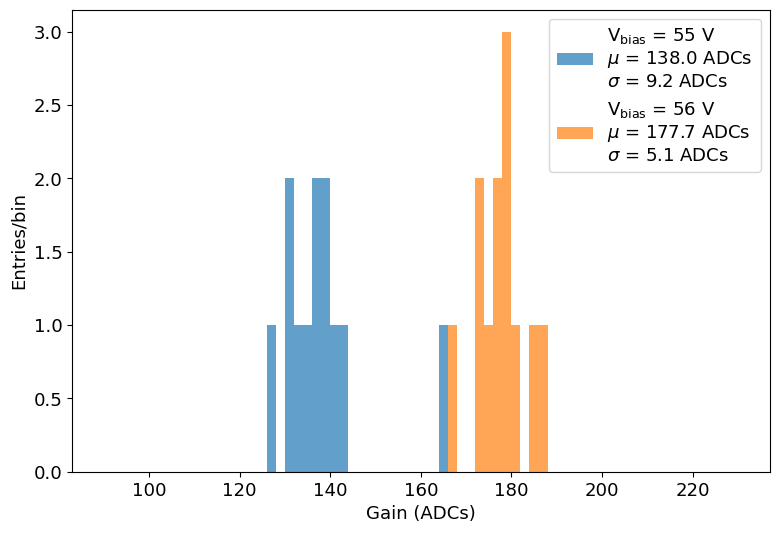

In [398]:
lab1 = 'V$_{\mathrm{bias}}$ = 55 V \n$\mu$ = '+f'{np.round(np.mean(gains_vb55), 1)} ADCs \n$\sigma$ = {np.round(np.std(gains_vb55), 1)} ADCs'
lab2 = 'V$_{\mathrm{bias}}$ = 56 V \n$\mu$ = '+f'{np.round(np.mean(gains_vb56), 1)} ADCs \n$\sigma$ = {np.round(np.std(gains_vb56), 1)} ADCs'

plt.hist(gains_vb55, bins=70, range=(90, 230), label=lab1, alpha=0.7)
plt.hist(gains_vb56, bins=70, range=(90, 230), label=lab2, alpha=0.7)
plt.xlabel('Gain (ADCs)')
plt.ylabel('Entries/bin')
plt.legend()
plt.show()

### Compute the quantum efficiency

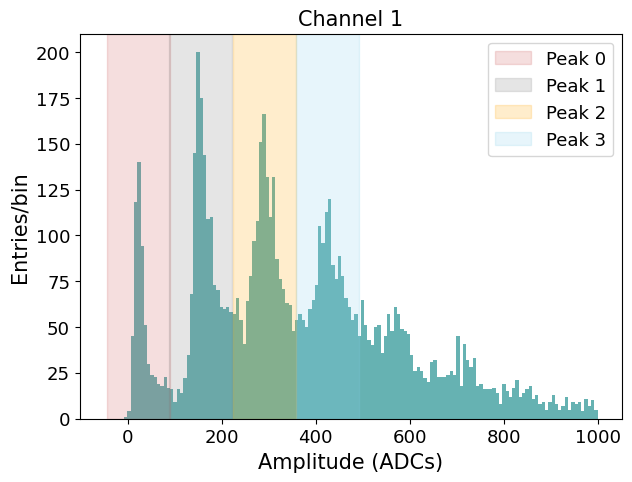

In [358]:
colors = ['indianred', 'grey', 'orange', 'skyblue']

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(-50, 1000), alpha=0.6, color='teal')
means_ch1 = all_means[channel_v(channel=1, vbias=55, vled=7.6)]
gain_ch1  = all_gains[channel_v(channel=1, vbias=55, vled=7.6)]

for i, (mean, col) in enumerate(zip(means_ch1[:3], colors[:3])):
    plt.axvspan(mean-gain_ch1/2, mean+gain_ch1/2, alpha=0.2, color=col, label=f'Peak {i}')
plt.axvspan(means_ch1[2]+gain_ch1/2, means_ch1[2]+3*gain_ch1/2, alpha=0.2, color='skyblue', label=f'Peak 3')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Channel 1", fontsize=15)
plt.legend()
plt.show()

### Compute the quantum efficiency for the different channels

In [382]:
integ_all_chs = {}

for vb in [55, 56]:
    for ch,vl in zip(channels, vleds0):
        means_ch1 = all_means[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        gain_ch1  = all_gains[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        ints_ch   = []
        for mean_ch in means_ch1[:3]:
            ch_spec    = all_max_data[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
            peak_wf_rt = np.sum(ch_spec[(ch_spec>(mean_ch-gain_ch1/2)) & (ch_spec<(mean_ch+gain_ch1/2))])
            ints_ch.append(peak_wf_rt)
            
        ints_ch.append(np.sum(ch_spec[(ch_spec>(means_ch1[2]+gain_ch1/2)) & (ch_spec<(means_ch1[2]+3*gain_ch1/2))]))
        
        integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)] = np.array(ints_ch)

In [383]:
integ_all_chs

{channel(channel=1, vbias=55, vled=7.6): array([ 20269., 238317., 484711., 606740.], dtype=float32),
 channel(channel=2, vbias=55, vled=7.6): array([ 17752., 221629., 499799., 595001.], dtype=float32),
 channel(channel=3, vbias=55, vled=7.6): array([ 19765., 257383., 539033., 581079.], dtype=float32),
 channel(channel=55, vbias=55, vled=6.6): array([ 1682., 22799., 65414., 71939.], dtype=float32),
 channel(channel=56, vbias=55, vled=6.6): array([  940., 21074., 55763., 74657.], dtype=float32),
 channel(channel=57, vbias=55, vled=6.6): array([ 1916., 23926., 63956., 67094.], dtype=float32),
 channel(channel=58, vbias=55, vled=6.6): array([ 1201., 20968., 49462., 87158.], dtype=float32),
 channel(channel=59, vbias=55, vled=6.6): array([  418., 15490., 48378., 67203.], dtype=float32),
 channel(channel=60, vbias=55, vled=6.6): array([ 1352., 21705., 56252., 70940.], dtype=float32),
 channel(channel=64, vbias=55, vled=6.6): array([ 1211., 17755., 54455., 84752.], dtype=float32),
 channel(ch

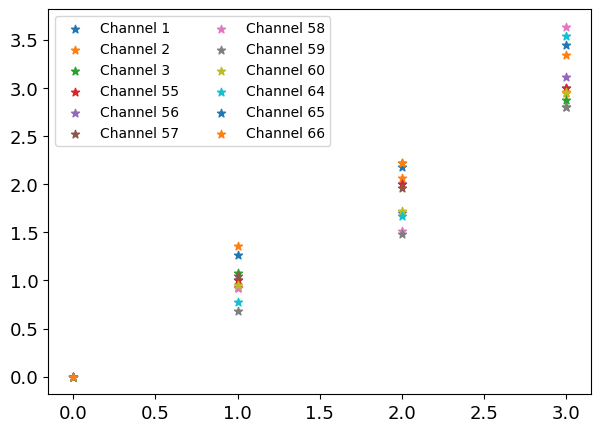

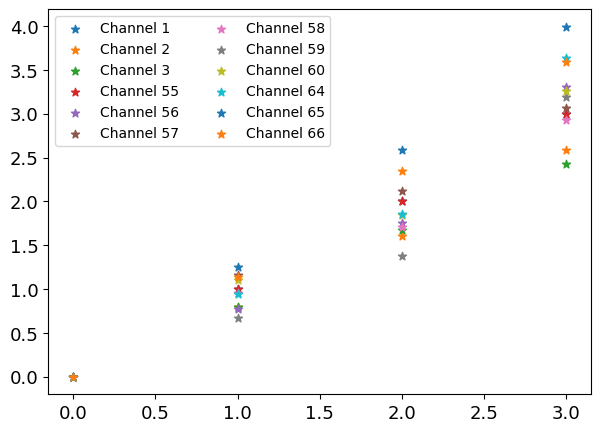

In [384]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch < 4:
            ref_ch = integ_all_chs[channel_v(channel=1,  vbias=vb, vled=7.6)]
        else:
            ref_ch = integ_all_chs[channel_v(channel=55, vbias=vb, vled=6.6)]
        plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', label=f'Channel {ch}')
    plt.legend(fontsize=10, ncol=2)
    plt.show()

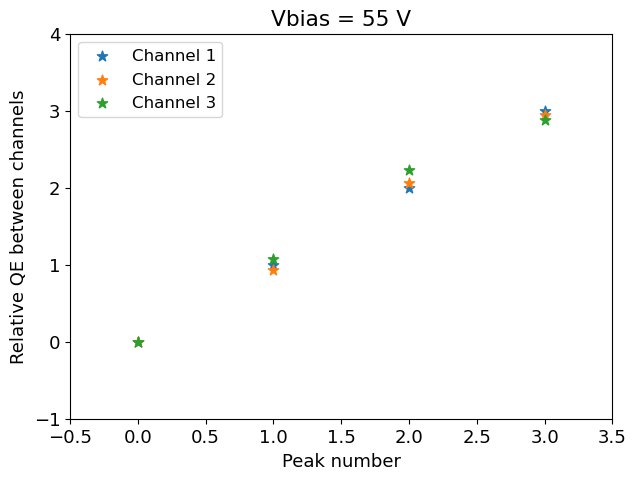

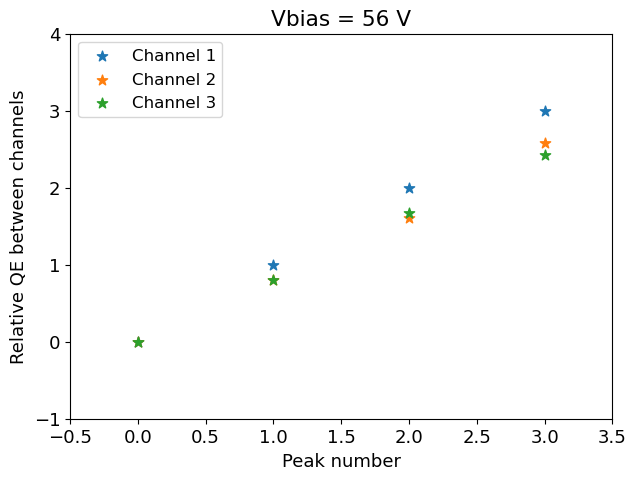

In [396]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch < 4:
            ref_ch = integ_all_chs[channel_v(channel=1,  vbias=vb, vled=7.6)]
            plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', s=60, label=f'Channel {ch}')
    plt.legend(fontsize=12)
    plt.title(f'Vbias = {vb} V')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 4)
    plt.xlabel('Peak number')
    plt.ylabel('Relative QE between channels')
    plt.show()

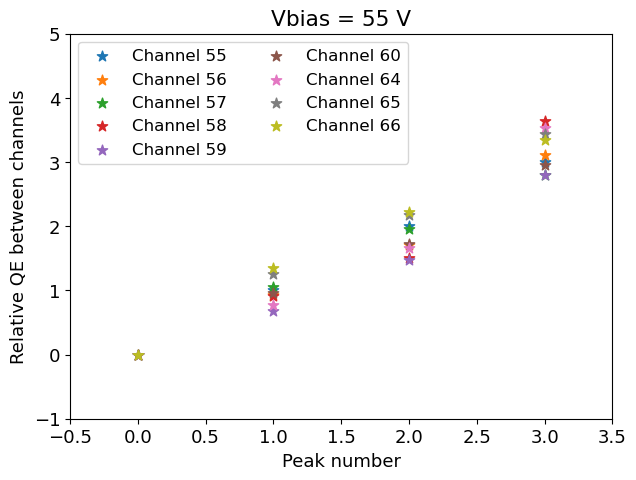

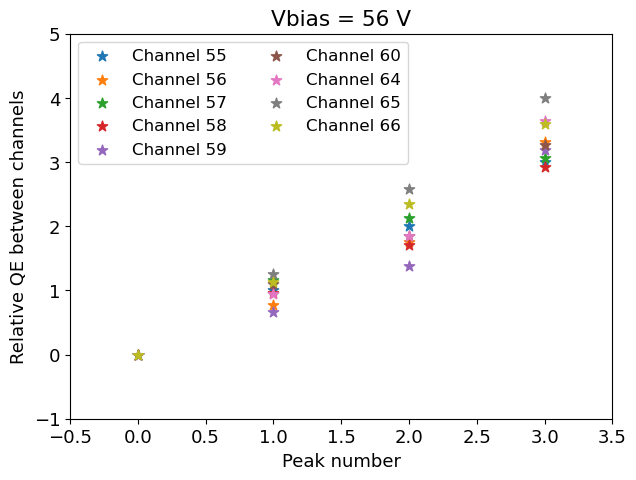

In [397]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch > 4:
            ref_ch = integ_all_chs[channel_v(channel=55,  vbias=vb, vled=6.6)]
            plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', s=60, label=f'Channel {ch}')
    plt.title(f'Vbias = {vb} V')
    plt.legend(fontsize=12, ncol=2)
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 5)
    plt.xlabel('Peak number')
    plt.ylabel('Relative QE between channels')
    plt.show()

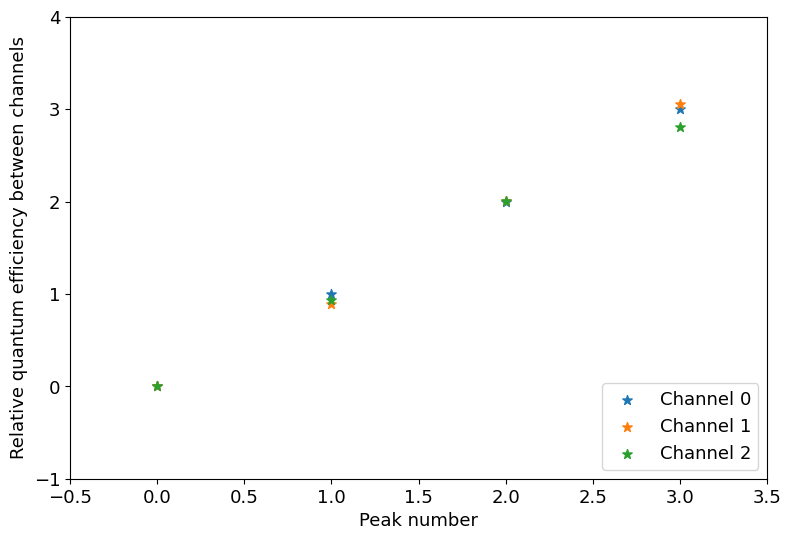

In [164]:
plt.scatter(np.arange(4), np.array([peak0_wf0_rt2*0/peak0_wf0_rt2,  peak1_wf0_rt2/peak1_wf0_rt2,  peak2_wf0_rt2*2/peak2_wf0_rt2,  peak3_wf0_rt2*3/peak3_wf0_rt2]),  marker='*', s=50, label='Channel 0')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt6*0/peak0_wf0_rt2,  peak1_wf0_rt6/peak1_wf0_rt2,  peak2_wf0_rt6*2/peak2_wf0_rt2,  peak3_wf0_rt6*3/peak3_wf0_rt2]),  marker='*', s=50, label='Channel 1')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt10*0/peak0_wf0_rt2, peak1_wf0_rt10/peak1_wf0_rt2, peak2_wf0_rt10*2/peak2_wf0_rt2, peak3_wf0_rt10*3/peak3_wf0_rt2]), marker='*', s=50, label='Channel 2')
plt.xlim(-0.5, 3.5)
plt.ylim(-1, 4)
plt.xlabel('Peak number')
plt.ylabel('Relative quantum efficiency between channels')
plt.legend(loc=4)
plt.show()

In [166]:
np.sum(np.array([peak0_wf0_rt2*0/peak0_wf0_rt2,  peak1_wf0_rt2/peak1_wf0_rt2,  peak2_wf0_rt2*2/peak2_wf0_rt2,  peak3_wf0_rt2*3/peak3_wf0_rt2])), np.sum(np.array([peak0_wf0_rt6*0/peak0_wf0_rt2,  peak1_wf0_rt6/peak1_wf0_rt2,  peak2_wf0_rt6*2/peak2_wf0_rt2,  peak3_wf0_rt6*3/peak3_wf0_rt2])), np.sum(np.array([peak0_wf0_rt10*0/peak0_wf0_rt2, peak1_wf0_rt10/peak1_wf0_rt2, peak2_wf0_rt10*2/peak2_wf0_rt2, peak3_wf0_rt10*3/peak3_wf0_rt2]))

(6.0, 5.953267695078392, 5.755190879988198)

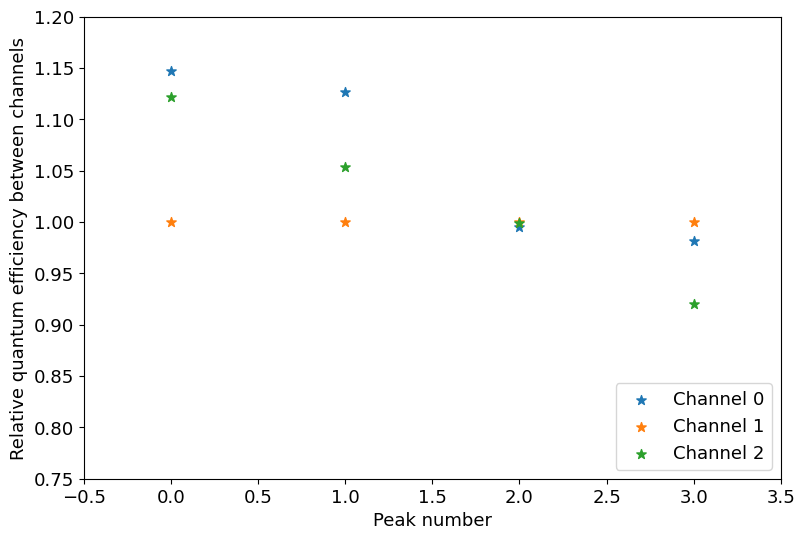

In [153]:
plt.scatter(np.arange(4), np.array([peak0_wf0_rt2/peak0_wf0_rt6,  peak1_wf0_rt2/peak1_wf0_rt6,  peak2_wf0_rt2/peak2_wf0_rt6,  peak3_wf0_rt2/peak3_wf0_rt6]),  marker='*', s=50, label='Channel 0')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt6/peak0_wf0_rt6,  peak1_wf0_rt6/peak1_wf0_rt6,  peak2_wf0_rt6/peak2_wf0_rt6,  peak3_wf0_rt6/peak3_wf0_rt6]),  marker='*', s=50, label='Channel 1')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt10/peak0_wf0_rt6, peak1_wf0_rt10/peak1_wf0_rt6, peak2_wf0_rt10/peak2_wf0_rt6, peak3_wf0_rt10/peak3_wf0_rt6]), marker='*', s=50, label='Channel 2')
plt.xlim(-0.5, 3.5)
plt.ylim(0.75, 1.20)
plt.xlabel('Peak number')
plt.ylabel('Relative quantum efficiency between channels')
plt.legend(loc=4)
plt.show()

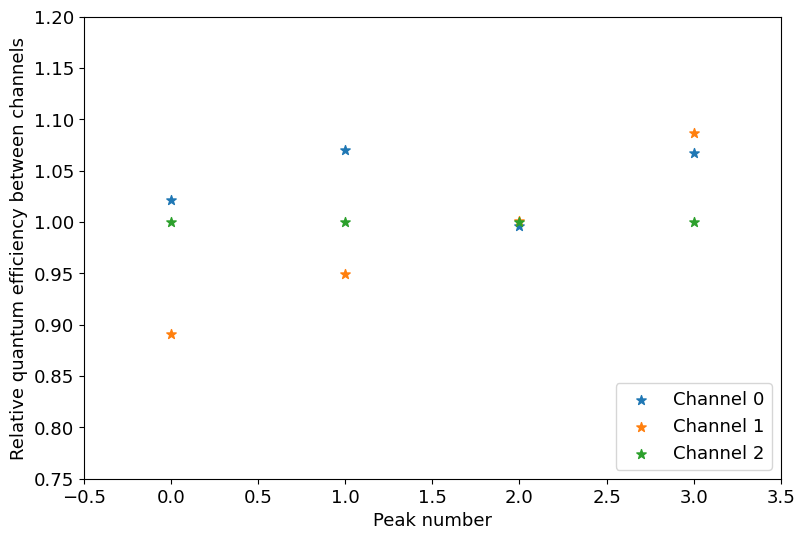

In [154]:
plt.scatter(np.arange(4), np.array([peak0_wf0_rt2/peak0_wf0_rt10,  peak1_wf0_rt2/peak1_wf0_rt10,  peak2_wf0_rt2/peak2_wf0_rt10,  peak3_wf0_rt2/peak3_wf0_rt10]),  marker='*', s=50, label='Channel 0')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt6/peak0_wf0_rt10,  peak1_wf0_rt6/peak1_wf0_rt10,  peak2_wf0_rt6/peak2_wf0_rt10,  peak3_wf0_rt6/peak3_wf0_rt10]),  marker='*', s=50, label='Channel 1')
plt.scatter(np.arange(4), np.array([peak0_wf0_rt10/peak0_wf0_rt10, peak1_wf0_rt10/peak1_wf0_rt10, peak2_wf0_rt10/peak2_wf0_rt10, peak3_wf0_rt10/peak3_wf0_rt10]), marker='*', s=50, label='Channel 2')
plt.xlim(-0.5, 3.5)
plt.ylim(0.75, 1.20)
plt.xlabel('Peak number')
plt.ylabel('Relative quantum efficiency between channels')
plt.legend(loc=4)
plt.show()

### Other files

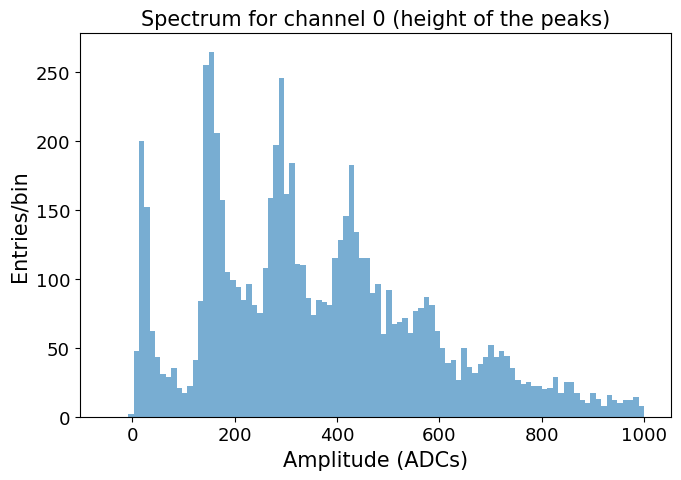

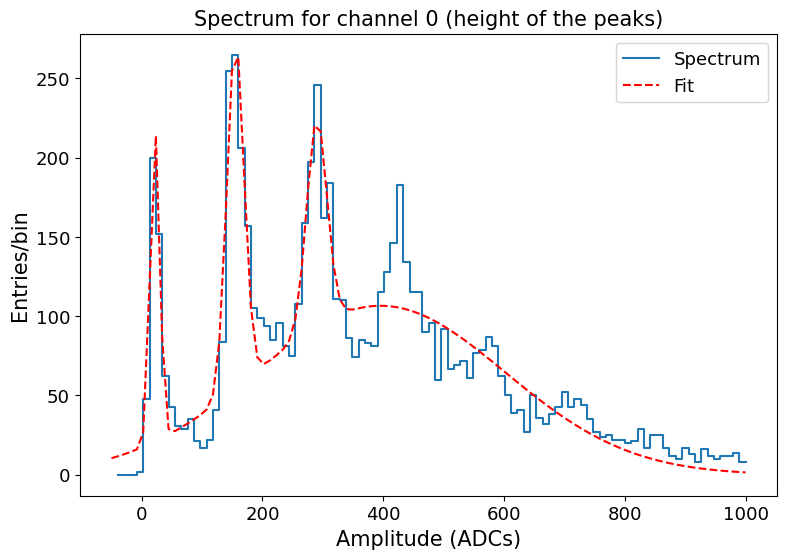

Fitted Parameters:
Peak 1: Amplitude=195.67, Mean=22.12, StdDev=7.93
Peak 2: Amplitude=219.66, Mean=155.26, StdDev=14.24
Peak 3: Amplitude=131.26, Mean=289.96, StdDev=16.65
Peak 4: Amplitude=106.61, Mean=395.35, StdDev=206.58

Fitted Parameters with Errors:
Peak 1: Amplitude=195.67 ± 22.12, Mean=22.12 ± 0.95, StdDev=7.93 ± 1.12
Peak 2: Amplitude=219.66 ± 15.84, Mean=155.26 ± 1.15, StdDev=14.24 ± 1.25
Peak 3: Amplitude=131.26 ± 14.62, Mean=289.96 ± 2.09, StdDev=16.65 ± 2.25
Peak 4: Amplitude=106.61 ± 4.61, Mean=395.35 ± 11.43, StdDev=206.58 ± 10.51


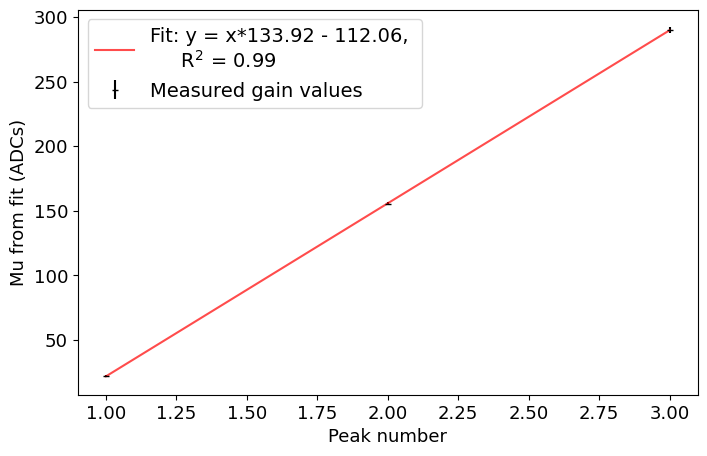

In [179]:
plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(max_wf0_rt3, bins=100, range=(-50, 1000), alpha=0.6, label='Channel0')
#plt.axvline(x=430, color='r')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

initial_guess = [200, 20, 6, 250, 150, 10, 120, 300, 15, 150, 430, 30]  # Initial guess for the parameters
popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)

plt.step(x[1:], y, label='Spectrum')
plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.legend()
plt.show()

print('Fitted Parameters:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f}, Mean={popt[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f}')

perr = np.sqrt(np.diag(pcov))

# Print the fitted parameters with their errors
print("")
print('Fitted Parameters with Errors:')
for i in range(len(popt)//3):
    print(f'Peak {i+1}: Amplitude={popt[i*3]:.2f} ± {perr[i*3]:.2f}, Mean={popt[i*3+1]:.2f} ± {perr[i*3+1]:.2f}, StdDev={popt[i*3+2]:.2f} ± {perr[i*3+2]:.2f}')
    

perr = np.sqrt(np.diag(pcov))

all_means     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
all_means_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])

gain = plot_linear_fit(all_means[:3], all_means_err[:3])

### Try other fitting methods:

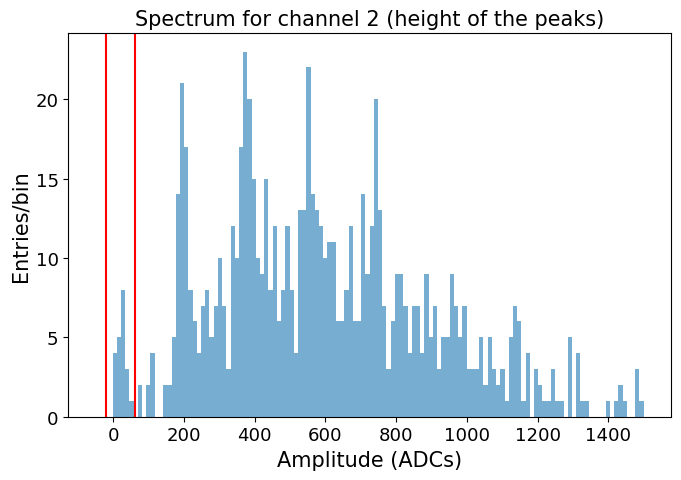

In [228]:
plt.figure(figsize=(7, 5))
lspec, bins, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=130, range=(-50, 1500), alpha=0.6, label='Channel0')
plt.axvline(x=-20, color='r')
plt.axvline(x= 60, color='r')
plt.xlabel('Amplitude (ADCs)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.tight_layout()
plt.show()

ValueError: Zero or negative value found in argument sigma. Errors must be greater than 0.

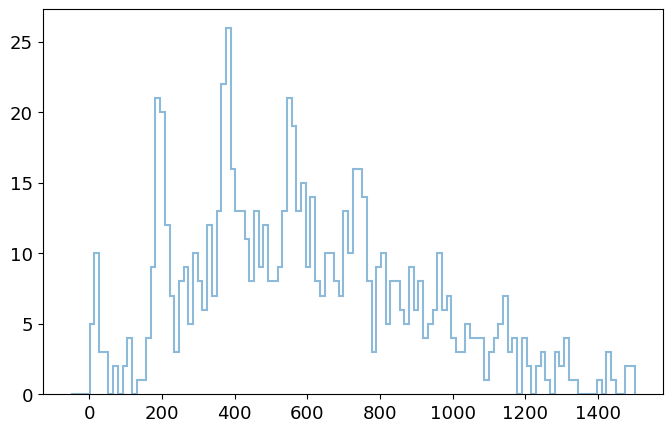

In [229]:
fitf.gaussian_fit_IC(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)],
                     bins=120, 
                     prange=(-50, 1500), 
                     ampl=10, 
                     mean=10, 
                     sigma=10, 
                     frange=(-20, 60), 
                     title='', 
                     ndec=2, 
                     print_chi2=True)

In [191]:
from functools import partial
from scipy.signal import find_peaks_cwt

def poisson_scaled_gaussians(                  *,
                             first        = 0   ,
                             n_gaussians  = None,
                             min_integral = None):
    if n_gaussians is None and min_integral is None:
        raise ValueError(     "Either n_gaussians or min_integral must be given")

    if min_integral is not None and n_gaussians is not None:
        raise ValueError("Only one of n_gaussians or min_integral must be given")

    @set_n_gaussians
    def sum_of_gaussians(xs,
                         scale, poisson_mean,
                         pedestal_mean, pedestal_sigma,
                         gain, gain_sigma):
        if min_integral is None:
            ngaussians = n_gaussians
            integrals  = tuple(scale * poisson_factor(k, poisson_mean) for k in range(ngaussians))
        else:
            (ngaussians,
             integrals ) = number_of_gaussians(min_integral, scale, poisson_mean)

        def spectrum_component(i):
            centroid       =  pedestal_mean     + i * gain
            sigma          = (pedestal_sigma**2 + i * gain_sigma**2)**0.5
            gauss_spectrum = gauss(xs, 1, centroid, sigma)
            if i: gauss_spectrum = suppress_negative_energy_contribution(xs, gauss_spectrum)

            return integrals[i] * gauss_spectrum

        return sum(map(spectrum_component, range(first, ngaussians))), ngaussians

    return sum_of_gaussians


def scaled_dark_pedestal(dark_spectrum,
                         pedestal_mean, pedestal_sigma,
                         min_integral):
    sum_of_gaussians = poisson_scaled_gaussians(first=1, min_integral=min_integral)

    @set_n_gaussians
    def scaled_dark_pedestal(xs,
                             scale, poisson_mean,
                             gain, gain_sigma):
        pedestal = np.exp(-poisson_mean) * dark_spectrum
        signal   = sum_of_gaussians(xs,
                                    scale, poisson_mean,
                                    pedestal_mean, pedestal_sigma,
                                    gain, gain_sigma)
        return pedestal + signal, sum_of_gaussians.n_gaussians
    return scaled_dark_pedestal

def poisson_sigma(x, default=3):
    u = x**0.5
    u[x==0] = default
    return u

def dark_scaler(dark_spectrum):
    """
    A function to scale dark spectrum with mu value.
    """
    def scaled_spectrum(x, mu):
        return np.exp(-mu) * dark_spectrum
    return scaled_spectrum

In [207]:
def sensor_values(sensor_type, scaler, bins, spectrum, ped_vals):
    """
    Define different values and ranges of the spectra depending on the sensor type.
    """
    spectra         = spectrum
    peak_range      = np.arange(4, 20)
    min_bin_peak    = 10
    max_bin_peak    = 22
    half_peak_width = 5
    p1pe_seed       = 3
    lim_ped         = 10000
    return SensorParams(spectra, peak_range, min_bin_peak, max_bin_peak, half_peak_width, p1pe_seed, lim_ped)

from collections import namedtuple
SensorParams = namedtuple('SensorParams', ['spectra', 'peak_range', 'min_bin_peak', 'max_bin_peak', 'half_peak_width', 'p1pe_seed', 'lim_ped'])

def seeds_and_bounds(sensor_type, run_no, n_chann, scaler, bins, spectrum, ped_vals,
                     detector, ped_errs, func='dfunc', use_db_gain_seeds=True):
    """ Define the seeds and bounds to be used for calibration fits.

        Parameters
        ----------
        sensor_type   : AutoNameEnumBase
        Input of type of sensor: SensorType.SIPM or SensorType.PMT.
        run_no        : int
        Run number.
        n_chann       : int
        Channel number (sensor ID).
        scaler        : callable
        Scale function.
        bins          : np.array
        Number of divisions in the x axis.
        spectrum      : np.array
        Spectra, charge values of the signal.
        ped_vals      : np.array
        Values for the pedestal fit.
        detector      : string
        Input for the used detector.
        ped_errs      : np.array
        Errors of the values for the pedestal fit.
        func          : callable, optional
        Function used for fitting. Defaults to dfunc.
        use_db_gain_seeds : bool, optional
        If True, seeds are taken from previous runs in database.
        If False, peaks are found with find_peaks_cwt function.

        Returns
        -------
        sd0 : sequence
        Seeds for normalization, mu, gain and sigma.
        bd0 : sequence
        Minimum and maximum limits for the previous variables.
    """

    norm_seed   = spectrum.sum()
    sens_values = sensor_values(sensor_type, scaler, bins, spectrum, ped_vals)
    gain_seed, gain_sigma_seed = (130, 10)

    mu_seed = poisson_mu_seed(sensor_type, scaler, bins, spectrum, ped_vals)
    if mu_seed < 0: mu_seed = 0.001

    ped_seed      = ()
    ped_bound_low = ()
    ped_bound_upp = ()

    if 'gau' in func:
        ped_values    = pedestal_values(ped_vals, sens_values.lim_ped , ped_errs)
        ped_seed      = (ped_values.gain        , ped_values.sigma    )
        ped_bound_low = (ped_values.gain_min    , ped_values.gain_max )
        ped_bound_upp = (ped_values.sigma_min   , ped_values.sigma_max)

    seed   = (norm_seed, mu_seed) + ped_seed      + (gain_seed, gain_sigma_seed)
    bound1 = (0       ,       0)  + ped_bound_low + (0        ,           0.001)
    bound2 = (np.inf  ,   10000)  + ped_bound_upp + (10000    ,           10000)
    return seed, (bound1, bound2)

NameError: name 'poisson_mu_seed' is not defined

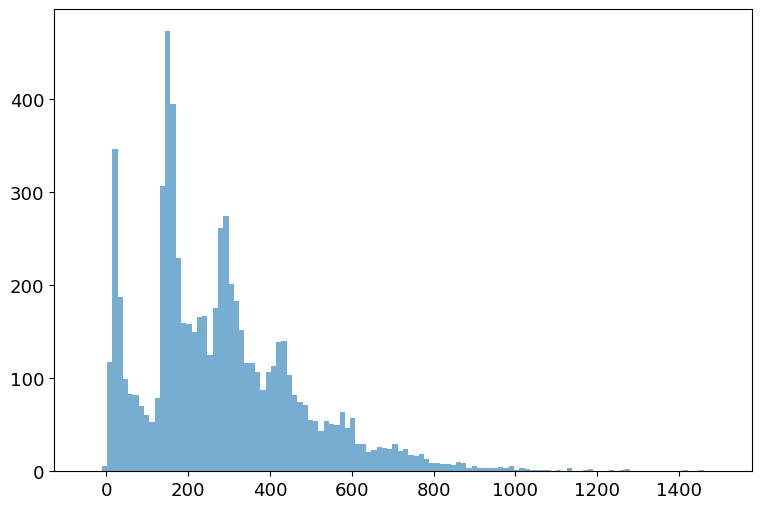

In [208]:
min_stat = 10

lspec, bins, _ = plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=120, range=(-50, 1500), alpha=0.6, label='Channel0')

ffuncs = {'dfunc': partial(scaled_dark_pedestal, min_integral=100)}

# Loop over the spectra:

# Limits for safe fit
valid_bins = np.argwhere(lspec >= min_stat)
# This is due to the nature of np.argwhere. b1 first bin, b2 last bin
b1 = valid_bins[0][0]
b2 = valid_bins[-1][0]

# Seed finding
peaks_dark = find_peaks_cwt(lspec, np.arange(2, 20), min_snr=2)

# Fit the dark spectrum with a Gaussian (not really necessary for the conv option)
gb0 = [(0, -100, 0), (1e99, 100, 10000)]
sd0 = (lspec.sum(), 0, 2)
sel = np.arange(peaks_dark[0]-5, peaks_dark[0]+5)
errs = poisson_sigma(lspec[sel], default=0.1)

gauss_fit_dark = fitf.fit(
    fitf.gauss, bins[sel], lspec[sel], sd0, sigma=errs, bounds=gb0)

# Scale just in case we lost a different amount of integrals in dark and led
## scale = led.sum() / dar.sum()
scale = 1.5

# Take into account the scale in seed finding (could affect Poisson mu)????
ped_vals = np.array([gauss_fit_dark.values[0] * scale,
                     gauss_fit_dark.values[1],
                     gauss_fit_dark.values[2]])
scaler_func = dark_scaler(lspec[b1:b2][(bins[b1:b2] >= -5) & (bins[b1:b2] <= 5)])

seeds, bounds = seeds_and_bounds('SiPM', run_no, ch, scaler_func, bins[b1:b2],
                                 lspec[b1:b2], ped_vals, 'demopp', gauss_fit_dark.errors, 'dfunc', False)


seed   = (bins[b1:b2].sum(), mu_seed) + ped_seed      + (gain_seed, gain_sigma_seed)
bound1 = (0       ,       0)  + ped_bound_low + (0        ,           0.001)
bound2 = (np.inf  ,   10000)  + ped_bound_upp + (10000    ,           10000)
    

respf = ffuncs[func_name](dark_spectrum=dar[b1:b2] * scale,
                          pedestal_mean=gauss_fit_dark.values[1],
                          pedestal_sigma=gauss_fit_dark.values[2])

# The fit
errs = poisson_sigma(lspec, default=0.001)
rfit = fitf.fit(respf, bins[b1:b2], lspec[b1:b2], seeds, sigma=errs[b1:b2], bounds=bounds)
chi  = rfit.chi2

print(f'Channel fit: {rfit.values}, Chi: {chi}')
print(channs[ich])
fig = plt.figure(figsize=(12,8))
plt.errorbar(bins, lspec, xerr=0.5*np.diff(bins)[0], yerr=errs, fmt='.')
plt.plot(bins[b1:b2], respf(bins[b1:b2], *rfit.values), 'r')
#plt.title(f'Channel {25000+chosen_sns}')
plt.xlabel('Amplitude (ADC)')
plt.ylabel('Entries/bin')
plt.xlim(-70, 220)
#fig.savefig(f"/Users/carmenromo/thesis/thesis_romo/black_box/fit_SensL_R{run_no}.pdf");
plt.show()
